importações

In [1]:
# Célula de Imports para o Notebook no VS Code

# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas de visualização
import plotly.graph_objects as go
import plotly.express as px
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Bibliotecas de interatividade e exibição
import ipywidgets as widgets
from IPython.display import display

# Bibliotecas para acesso ao Google Sheets
import gspread
from google.oauth2.service_account import Credentials

print("Todas as bibliotecas foram importadas com sucesso do seu ambiente virtual!")

Todas as bibliotecas foram importadas com sucesso do seu ambiente virtual!


In [3]:
# 1. Define os escopos (permissões) necessários para as APIs
#    (CORRIGIDO: URLs limpas, sem formatação de link)
scopes = [
    "https://www.googleapis.com/auth/spreadsheets"
]

# 2. Autentica usando o arquivo de credenciais da Conta de Serviço
#    Certifique-se de que o arquivo 'google_credentials.json' está na mesma pasta.
try:
    creds = Credentials.from_service_account_file("google_credentials.json", scopes=scopes)
    client = gspread.authorize(creds)
    print("Autenticação com a Conta de Serviço bem-sucedida!")
except FileNotFoundError:
    print("ERRO: O arquivo 'google_credentials.json' não foi encontrado. Verifique se ele está na pasta do seu projeto.")
    client = None
except Exception as e:
    print(f"Ocorreu um erro durante a autenticação: {e}")
    client = None


# 3. Carrega os dados das duas planilhas
df = None
df_equipe = None
if client:
    try:
        # Carrega a aba de dados principal
        # (CORRIGIDO: URL limpa, sem formatação de link)
        url_da_planilha = 'https://docs.google.com/spreadsheets/d/1juyOfIh0ZqsfJjN0p3gD8pKaAIX0R6IAPG9vysl7yWI/edit#gid=901870248'
        spreadsheet = client.open_by_url(url_da_planilha)
        
        # AÇÃO: Substitua "Controle de Tarefas" pelo nome exato da sua aba
        nome_aba_dados = "Total BaseCamp para Notas"
        worksheet_dados = spreadsheet.worksheet(nome_aba_dados)
        df = pd.DataFrame(worksheet_dados.get_all_records())
        print(f"Dados da aba '{nome_aba_dados}' carregados com sucesso!")

        # Carrega a aba de equipes
        nome_aba_equipes = "Equipes"
        worksheet_equipe = spreadsheet.worksheet(nome_aba_equipes)
        df_equipe = pd.DataFrame(worksheet_equipe.get_all_records())
        print(f"Dados da aba '{nome_aba_equipes}' carregados com sucesso!")

        # Exibe as primeiras linhas para confirmar
        display(df.head())
        
    except Exception as e:
        print(f"Não foi possível carregar os dados. Verifique se a planilha foi compartilhada com o e-mail da sua conta de serviço e se os nomes das abas estão corretos.")
        print(f"Detalhe do erro: {e}")




Autenticação com a Conta de Serviço bem-sucedida!
Dados da aba 'Total BaseCamp para Notas' carregados com sucesso!
Dados da aba 'Equipes' carregados com sucesso!


,ID,Data Inicial,Data Final,Data Estipulada,Encarregado,Nome Task,Link,Observação,Peso,Pablo,Leonardo,Itiel,Ítalo
0,8.790000e+11,2025-06-25,2025-07-01,2025-07-01,GABRIEL OLIVEIRA,[EXPLORIT] Criar 57 icones faltantes [CORE],https://3.basecamp.com/3619571/buckets/4234237...,,1,,,,
1,8.710000e+11,2025-06-02,2025-06-30,2025-06-30,GABRIEL VENTURINI,[SUPORTE] Corrigir problema na replicação de i...,https://3.basecamp.com/3619571/buckets/4234237...,,1,,,,
2,8.660000e+11,2025-04-08,2025-07-02,2025-07-02,GABRIEL VENTURINI,*[API] - Basecamp - Consumir api do basecamp,https://3.basecamp.com/3619571/buckets/4234237...,,5,,,,
3,8.820000e+11,2025-07-02,2025-07-02,2025-07-02,GABRIEL VENTURINI,[IA] Treinar IA com o modelo de dados,https://3.basecamp.com/3619571/buckets/4234237...,,1,5,,,
4,8.770000e+11,2025-06-18,2025-07-02,2025-07-02,ISAAC,[DEV] Integrar Tela de cadastro com Cognito,https://3.basecamp.com/3619571/buckets/4234237...,,1,,,,


Abrir planilha

Abrir pagina

In [ ]:
# Selecionar a página pelo nome (ex: 'Página1', 'Respostas', etc.)
#worksheet = spreadsheet.worksheet('Página1')

# Ou, selecionar a primeira página da planilha
worksheet = spreadsheet.get_worksheet(2)
worksheet_equipe = spreadsheet.get_worksheet(3)
display(df.head())

NameError: name 'spreadsheet' is not defined

Exemplo Completo: Autenticar, Abrir e Ler Dados
Aqui está um código completo que você pode copiar, colar e adaptar. Ele autentica, abre a planilha pelo nome, seleciona a primeira página e exibe todos os dados contidos nela.

In [5]:
"""#import gspread
from google.colab import auth
from google.auth import default
import pandas as pd

# 1. AUTENTICAÇÃO
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# 2. ABRIR A PLANILHA (use o nome exato do seu arquivo)
try:
    spreadsheet = gc.open('Nome da Sua Planilha Aqui')
    print(f"Planilha '{spreadsheet.title}' encontrada.")

    # 3. SELECIONAR A PÁGINA/ABA (use o nome exato da sua aba)
    worksheet = spreadsheet.worksheet('Página1')
    print(f"Aba '{worksheet.title}' selecionada.")

    # 4. LER OS DADOS DA PÁGINA
    # Pega todos os valores como uma lista de listas
    dados = worksheet.get_all_values()

    # Para visualizar melhor, vamos usar a biblioteca Pandas
    df = pd.DataFrame(dados[1:], columns=dados[0]) # Usa a primeira linha como cabeçalho
    print("\nConteúdo da Planilha:")
    print(df)

except gspread.exceptions.SpreadsheetNotFound:
    print("ERRO: Planilha não encontrada. Verifique o nome e as permissões de compartilhamento.")
except gspread.exceptions.WorksheetNotFound:
    print("ERRO: Aba/Página não encontrada. Verifique o nome da aba.")"""

'#import gspread\nfrom google.colab import auth\nfrom google.auth import default\nimport pandas as pd\n\n# 1. AUTENTICAÇÃO\nauth.authenticate_user()\ncreds, _ = default()\ngc = gspread.authorize(creds)\n\n# 2. ABRIR A PLANILHA (use o nome exato do seu arquivo)\ntry:\n    spreadsheet = gc.open(\'Nome da Sua Planilha Aqui\')\n    print(f"Planilha \'{spreadsheet.title}\' encontrada.")\n\n    # 3. SELECIONAR A PÁGINA/ABA (use o nome exato da sua aba)\n    worksheet = spreadsheet.worksheet(\'Página1\')\n    print(f"Aba \'{worksheet.title}\' selecionada.")\n\n    # 4. LER OS DADOS DA PÁGINA\n    # Pega todos os valores como uma lista de listas\n    dados = worksheet.get_all_values()\n\n    # Para visualizar melhor, vamos usar a biblioteca Pandas\n    df = pd.DataFrame(dados[1:], columns=dados[0]) # Usa a primeira linha como cabeçalho\n    print("\nConteúdo da Planilha:")\n    print(df)\n\nexcept gspread.exceptions.SpreadsheetNotFound:\n    print("ERRO: Planilha não encontrada. Verifique o no

Abrir a Planilha

In [5]:

# Pega todos os valores como uma lista de listas
dados = worksheet_dados.get_all_values()
# Para visualizar melhor, vamos usar a biblioteca Pandas
df = pd.DataFrame(dados[1:], columns=dados[0]) # Usa a primeira linha como cabeçalho
print("\nConteúdo da Planilha:")
print(df.head(5))


Conteúdo da Planilha:
         ID Data Inicial  Data Final Data Estipulada        Encarregado  \
0  8,79E+09   2025-06-25  2025-07-01      2025-07-01   GABRIEL OLIVEIRA   
1  8,71E+09   2025-06-02  2025-06-30      2025-06-30  GABRIEL VENTURINI   
2  8,66E+09   2025-04-08  2025-07-02      2025-07-02  GABRIEL VENTURINI   
3  8,82E+09   2025-07-02  2025-07-02      2025-07-02  GABRIEL VENTURINI   
4  8,77E+09   2025-06-18  2025-07-02      2025-07-02              ISAAC   

                                           Nome Task  \
0        [EXPLORIT] Criar 57 icones faltantes [CORE]   
1  [SUPORTE] Corrigir problema na replicação de i...   
2       *[API] - Basecamp - Consumir api do basecamp   
3              [IA] Treinar IA com o modelo de dados   
4        [DEV] Integrar Tela de cadastro com Cognito   

                                                Link Observação Peso Pablo  \
0  https://3.basecamp.com/3619571/buckets/4234237...               1         
1  https://3.basecamp.com/3619571

In [6]:
dados_equipe = worksheet_equipe.get_all_values()
# Para visualizar melhor, vamos usar a biblioteca Pandas
df_equipe = pd.DataFrame(dados_equipe[1:], columns=dados_equipe[0]) # Usa a primeira linha como cabeçalho
print("\nConteúdo da Planilha:")
print(df_equipe.head(5))


Conteúdo da Planilha:
            Nome      Status Posição
0          ISAAC       Ativo        
1          ÍTALO       Ativo   Lider
2          ITIEL  Desativado   Lider
3  LUCAS TAVARES       Ativo        
4        OCTAVIO       Ativo        


total_de_linhas = len(df)
print(f"\nO DataFrame tem {total_de_linhas} linhas.")
# Saída: O DataFrame tem 7 linhas.

In [7]:
total_de_linhas = len(df)
print(f"\nO DataFrame tem {total_de_linhas} linhas.")


O DataFrame tem 533 linhas.


Para ver o formato (linhas e colunas) - O método .shape:
O .shape é um atributo que retorna uma tupla (linhas, colunas).

In [8]:
formato = df.shape
print(f"O formato do DataFrame é: {formato}")
# Saída: O formato do DataFrame é: (7, 5)

print(f"Número de linhas: {df.shape[0]}")      # Pega o primeiro elemento da tupla
print(f"Número de colunas: {df.shape[1]}")    # Pega o segundo elemento da tupla

O formato do DataFrame é: (533, 13)
Número de linhas: 533
Número de colunas: 13


Somar os Valores de uma Coluna Baseado nos Valores de Outra
Esta é uma das operações mais poderosas e é feita com o método .groupby(). A ideia é "agrupar por" uma coluna categórica e depois aplicar uma operação (soma, média, contagem, etc.) a uma coluna numérica.

Pergunta de Exemplo: "Qual foi o valor total vendido de cada produto?"

Lógica: Queremos agrupar por Produto e somar o Valor_Total.

Código:

In [9]:
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce') # Substitua 'Valor' pelo nome real da sua coluna
df['Peso'].fillna(0, inplace=True) # Substitui todos os NaN na coluna 'Valor' por 0
total_por_Encarregado = df.groupby('Encarregado')['Peso'].sum()
print("\nValor total vendido por produto:")
print(total_por_Encarregado)


Valor total vendido por produto:
Encarregado
ALEXANDRE                0.0
DA SEMANA 25/08/2025     0.0
GABRIEL OLIVEIRA        12.0
GABRIEL VENTURINI       53.0
GUILHERME               29.0
ISAAC                   43.0
ITIEL                   74.0
LEONARDO                84.0
LUCAS DE ALENCAR         7.0
LUCAS TAVARES           78.0
MARCUS                   1.0
MATHEUS                 59.0
OCTAVIO                 70.0
PABLO                   20.0
SEM NOME                 3.0
VINICIUS                57.0
ÍTALO                   47.0
Name: Peso, dtype: float64


C:\Users\Miron\AppData\Local\Temp\ipykernel_7176\2241938760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Peso'].fillna(0, inplace=True) # Substitui todos os NaN na coluna 'Valor' por 0


Contar a quantidade de vezes que cada valor aparece

In [12]:
# Selecione a coluna 'Produto' e aplique o método .value_counts()
contagem_de_produtos = df['Encarregado'].value_counts()

print("Contagem de aparições de cada produto:")
print(contagem_de_produtos)

Contagem de aparições de cada produto:
Encarregado
LEONARDO                75
LUCAS TAVARES           69
ITIEL                   66
VINICIUS                63
ÍTALO                   52
ISAAC                   42
GUILHERME               35
MATHEUS                 34
GABRIEL VENTURINI       33
OCTAVIO                 24
PABLO                    9
GABRIEL OLIVEIRA         8
DA SEMANA 25/08/2025     8
LUCAS DE ALENCAR         6
MARCUS                   5
SEM NOME                 3
ALEXANDRE                1
Name: count, dtype: int64


singularizar pelo index

In [13]:
# Pega o total de peso do Gabriel Oliveira
peso_do_gabriel = total_por_Encarregado.loc['GABRIEL OLIVEIRA']
print(peso_do_gabriel)

12.0


transformar todas as colunas que interesse e colunas numericas

In [14]:
colunas_de_peso = ['Peso', 'Pablo', 'Leonardo','Itiel','Ítalo'] # Adapte com os nomes exatos dos seus líderes

# Loop para limpar cada coluna
for coluna in colunas_de_peso:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
    df[coluna].fillna(0, inplace=True)

print("\nDataFrame Após Limpeza:")
print(df)


DataFrame Após Limpeza:
           ID Data Inicial  Data Final Data Estipulada        Encarregado  \
0    8,79E+09   2025-06-25  2025-07-01      2025-07-01   GABRIEL OLIVEIRA   
1    8,71E+09   2025-06-02  2025-06-30      2025-06-30  GABRIEL VENTURINI   
2    8,66E+09   2025-04-08  2025-07-02      2025-07-02  GABRIEL VENTURINI   
3    8,82E+09   2025-07-02  2025-07-02      2025-07-02  GABRIEL VENTURINI   
4    8,77E+09   2025-06-18  2025-07-02      2025-07-02              ISAAC   
..        ...          ...         ...             ...                ...   
528  8,95E+09   2025-08-11                                       VINICIUS   
529  8,97E+09   2025-08-18                                       VINICIUS   
530  8,99E+09   2025-08-22                                       VINICIUS   
531  9,01E+09   2025-08-28                                       VINICIUS   
532  9,02E+09   2025-08-29                                       VINICIUS   

                                             Nome 

C:\Users\Miron\AppData\Local\Temp\ipykernel_7176\1792187038.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(0, inplace=True)


In [15]:
# Identifique apenas as colunas que são nomes de líderes
colunas_lideres = ['Pablo', 'Leonardo', 'Itiel', 'Ítalo'] # Adapte com os nomes dos seus líderes

soma_das_colunas_lideres = df[colunas_lideres].sum()
print("\nPasso 2: Soma de Cada Coluna de Líder")
print(soma_das_colunas_lideres)


Passo 2: Soma de Cada Coluna de Líder
Pablo       100.0
Leonardo     40.0
Itiel         5.0
Ítalo        50.0
dtype: float64


In [16]:
total_por_Encarregado.index = total_por_Encarregado.index.str.strip().str.upper()
soma_das_colunas_lideres.index = soma_das_colunas_lideres.index.str.strip().str.upper()
# Agora que ambos os índices estão em maiúsculas, a soma vai funcionar perfeitamente.
resultado_final = total_por_Encarregado.add(soma_das_colunas_lideres, fill_value=0)

print(resultado_final)

ALEXANDRE                 0.0
DA SEMANA 25/08/2025      0.0
GABRIEL OLIVEIRA         12.0
GABRIEL VENTURINI        53.0
GUILHERME                29.0
ISAAC                    43.0
ITIEL                    79.0
LEONARDO                124.0
LUCAS DE ALENCAR          7.0
LUCAS TAVARES            78.0
MARCUS                    1.0
MATHEUS                  59.0
OCTAVIO                  70.0
PABLO                   120.0
SEM NOME                  3.0
VINICIUS                 57.0
ÍTALO                    97.0
dtype: float64


In [17]:
# O método .add() soma as duas séries.
# fill_value=0 trata casos onde um líder está em uma série mas não na outra.
resultado_final = total_por_Encarregado.add(soma_das_colunas_lideres, fill_value=0)

print("\nResultado Final (Soma Combinada):")
print(resultado_final)


Resultado Final (Soma Combinada):
ALEXANDRE                 0.0
DA SEMANA 25/08/2025      0.0
GABRIEL OLIVEIRA         12.0
GABRIEL VENTURINI        53.0
GUILHERME                29.0
ISAAC                    43.0
ITIEL                    79.0
LEONARDO                124.0
LUCAS DE ALENCAR          7.0
LUCAS TAVARES            78.0
MARCUS                    1.0
MATHEUS                  59.0
OCTAVIO                  70.0
PABLO                   120.0
SEM NOME                  3.0
VINICIUS                 57.0
ÍTALO                    97.0
dtype: float64


In [17]:
#pip install streamlit pandas gspread oauth2client google-auth-httplib2 plotly-express

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
# Célula 2: Preparação dos Dados

# Copia o DataFrame para evitar alterar o original
df_grafico = df.copy()

# Passo 1: Converter a coluna "Data Final" para o formato de data.
# O argumento `errors='coerce'` é muito importante: ele transforma qualquer
# célula vazia ou com texto inválido em 'NaT' (Not a Time), que é o
# valor nulo para datas no pandas.
df_grafico['Data Final'] = pd.to_datetime(df_grafico['Data Final'], errors='coerce')

# Passo 2: Pegar a data de hoje.
# O método .normalize() remove as horas/minutos/segundos, deixando apenas a data.
data_hoje = pd.Timestamp.now().normalize()

# Passo 3: Criar a nova coluna "Data Final (aberta)".
# Usamos o método .fillna() para preencher todos os valores nulos (NaT)
# da coluna 'Data Final' com o valor da variável 'data_hoje'.
df_grafico['Data Final (aberta)'] = df_grafico['Data Final'].fillna(data_hoje)


# --- Verificação do Resultado ---
print(f"Coluna 'Data Final (aberta)' criada com sucesso!")
print(f"As tarefas sem data final foram preenchidas com: {data_hoje.date()}")

print("\n--- Comparando as colunas ---")
# Vamos exibir as duas colunas lado a lado para ver o resultado
display(df_grafico[['Data Final', 'Data Final (aberta)']].head(10))

print("\n--- Verificando as linhas que foram preenchidas ---")
# Filtramos para ver apenas as linhas onde a 'Data Final' original era nula
display(df_grafico[df_grafico['Data Final'].isnull()][['Nome Task', 'Data Final', 'Data Final (aberta)']].head())

Coluna 'Data Final (aberta)' criada com sucesso!
As tarefas sem data final foram preenchidas com: 2025-10-01

--- Comparando as colunas ---


,Data Final,Data Final (aberta)
0,2025-07-01,2025-07-01
1,2025-06-30,2025-06-30
2,2025-07-02,2025-07-02
3,2025-07-02,2025-07-02
4,2025-07-02,2025-07-02
5,2025-07-02,2025-07-02
6,2025-07-02,2025-07-02
7,2025-07-02,2025-07-02
8,2025-07-02,2025-07-02
9,2025-07-03,2025-07-03



--- Verificando as linhas que foram preenchidas ---


,Nome Task,Data Final,Data Final (aberta)
473,[SUPORTE] Levantar dados de cada componente: I...,NaT,2025-10-01
474,[EXCEL] Corrigir edição de categoria de FLUXO ...,NaT,2025-10-01
475,[DEV] Compatibilizar a integração com a nova v...,NaT,2025-10-01
476,[DEV] CONFIGURAR INTERFACE MOBILE PARA SITE ED...,NaT,2025-10-01
477,[P][SUPORTE] Implantar fluxo de imagemagick vi...,NaT,2025-10-01


Criar Nova Coluna de Status

In [21]:
import numpy as np
# Passo 2: Criar a coluna 'Status' usando np.where.
# A estrutura é: np.where(condição, valor_se_verdadeiro, valor_se_falso)
condicao = df_grafico['Data Final'].isnull() # A condição verifica se a data é nula (NaT)
valor_se_verdadeiro = 'Aberto'
valor_se_falso = 'Executado'

df_grafico['Status'] = np.where(condicao, valor_se_verdadeiro, valor_se_falso)


# --- Verificação do Resultado ---
print("Coluna 'Status' criada com sucesso!")

print("\nExibindo tarefas com status 'Executado':")
# Filtra pelas linhas onde 'Status' é 'Executado' para confirmar
display(df_grafico[df_grafico['Status'] == 'Executado'][['Nome Task', 'Data Final', 'Status']].head())

print("\nExibindo tarefas com status 'Aberto':")
# Filtra pelas linhas onde 'Status' é 'Aberto' para confirmar
display(df_grafico[df_grafico['Status'] == 'Aberto'][['Nome Task', 'Data Final', 'Status']].head())

Coluna 'Status' criada com sucesso!

Exibindo tarefas com status 'Executado':


,Nome Task,Data Final,Status
0,[EXPLORIT] Criar 57 icones faltantes [CORE],2025-07-01,Executado
1,[SUPORTE] Corrigir problema na replicação de i...,2025-06-30,Executado
2,*[API] - Basecamp - Consumir api do basecamp,2025-07-02,Executado
3,[IA] Treinar IA com o modelo de dados,2025-07-02,Executado
4,[DEV] Integrar Tela de cadastro com Cognito,2025-07-02,Executado



Exibindo tarefas com status 'Aberto':


,Nome Task,Data Final,Status
473,[SUPORTE] Levantar dados de cada componente: I...,NaT,Aberto
474,[EXCEL] Corrigir edição de categoria de FLUXO ...,NaT,Aberto
475,[DEV] Compatibilizar a integração com a nova v...,NaT,Aberto
476,[DEV] CONFIGURAR INTERFACE MOBILE PARA SITE ED...,NaT,Aberto
477,[P][SUPORTE] Implantar fluxo de imagemagick vi...,NaT,Aberto


Criar Coluna Contrato apartir da planilha equipe, que esta na variavel df_equipe

In [22]:
# Unir os dois DataFrames
# how='left': Mantém todas as linhas de df_grafico (a tabela da esquerda)
# left_on='Encarregado': A coluna chave em df_grafico
# right_on='Nome': A coluna chave em df_equipe
df_com_contrato = pd.merge(
    df_grafico,
    df_equipe,
    how='left',
    left_on='Encarregado',
    right_on='Nome'
)



In [23]:
# O merge adicionou as colunas de df_equipe ('Nome' e 'Status') ao final.
# Vamos renomear a coluna 'Status' (que veio de df_equipe) para 'Contrato'.
# O Pandas pode ter adicionado sufixos (_x, _y) se já existia uma coluna 'Status'.
# Para sermos seguros, vamos verificar os nomes das colunas e renomear corretamente.

# Vamos assumir que a coluna 'Status' de df_equipe é a que queremos renomear.
# Se o seu df_grafico já tinha uma coluna 'Status', o pandas pode chamá-la de 'Status_y'.
# Verifique o nome exato da coluna em df_completo.columns antes de renomear.
# Neste exemplo, vamos assumir que o nome é 'Status'. Se der erro, ajuste para 'Status_y'.
df_com_contrato.rename(columns={'Status_y': 'Contrato'}, inplace=True)
df_com_contrato.rename(columns={'Status_x': 'Status'}, inplace=True)



In [27]:
print(df_com_contrato)

           ID Data Inicial Data Final Data Estipulada        Encarregado  \
0    8,79E+09   2025-06-25 2025-07-01      2025-07-01   GABRIEL OLIVEIRA   
1    8,71E+09   2025-06-02 2025-06-30      2025-06-30  GABRIEL VENTURINI   
2    8,66E+09   2025-04-08 2025-07-02      2025-07-02  GABRIEL VENTURINI   
3    8,82E+09   2025-07-02 2025-07-02      2025-07-02  GABRIEL VENTURINI   
4    8,77E+09   2025-06-18 2025-07-02      2025-07-02              ISAAC   
..        ...          ...        ...             ...                ...   
533  8,95E+09   2025-08-11        NaT                           VINICIUS   
534  8,97E+09   2025-08-18        NaT                           VINICIUS   
535  8,99E+09   2025-08-22        NaT                           VINICIUS   
536  9,01E+09   2025-08-28        NaT                           VINICIUS   
537  9,02E+09   2025-08-29        NaT                           VINICIUS   

                                             Nome Task  \
0          [EXPLORIT] Criar 5

In [26]:
# A coluna 'Nome' (que veio de df_equipe) é redundante agora, então podemos removê-la.
df_com_contrato.drop(columns=['Nome'], inplace=True)




KeyError: "['Nome'] not found in axis"

In [28]:
# --- Verificação do Resultado ---
print("\n--- DataFrame Final com a nova coluna 'Contrato' ---")
display(df_com_contrato[['Encarregado', 'Contrato', 'Nome Task']].head())

print("\nResumo dos tipos de contrato adicionados:")
# .value_counts() é ótimo para verificar a distribuição da nova coluna
display(df_com_contrato['Contrato'].value_counts(dropna=False))


--- DataFrame Final com a nova coluna 'Contrato' ---


,Encarregado,Contrato,Nome Task
0,GABRIEL OLIVEIRA,Desativado,[EXPLORIT] Criar 57 icones faltantes [CORE]
1,GABRIEL VENTURINI,Ativo,[SUPORTE] Corrigir problema na replicação de i...
2,GABRIEL VENTURINI,Ativo,*[API] - Basecamp - Consumir api do basecamp
3,GABRIEL VENTURINI,Ativo,[IA] Treinar IA com o modelo de dados
4,ISAAC,Ativo,[DEV] Integrar Tela de cadastro com Cognito



Resumo dos tipos de contrato adicionados:


Contrato
Ativo         438
Desativado     92
NaN             8
Name: count, dtype: int64

Colocar calendario e (meses e semanas) em portugues

In [29]:
import holidays
import locale

# Define o locale para Português do Brasil para nomes de meses e dias da semana
# Isso garante que teremos 'Setembro' e 'Quinta-feira', por exemplo.
try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')
except locale.Error:
    print("Locale pt_BR.utf8 não encontrado, tentando 'Portuguese_Brazil'")
    try:
        locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil')
    except locale.Error:
        print("Locale em Português não encontrado. Os nomes de meses/dias podem aparecer em inglês.")


print("Ambiente preparado.")

Ambiente preparado.


In [31]:
# Célula 2: Criação da Tabela Calendário

# Pré-requisito: Garantir que a coluna 'Data Inicial' está no formato de data
# O errors='coerce' transforma qualquer erro em NaT (nulo), que será ignorado pelo .min()
df_grafico['Data Inicial'] = pd.to_datetime(df_grafico['Data Inicial'], errors='coerce')

# 1. Definir o intervalo de datas
data_inicio = df_grafico['Data Inicial'].min()
data_fim = pd.Timestamp.now() # Pega a data e hora exatas de agora

print(f"Gerando calendário de {data_inicio.date()} até {data_fim.date()}")

# 2. Criar a estrutura base do DataFrame com a coluna "Date"
tabela_calendario = pd.DataFrame({
    "Date": pd.date_range(start=data_inicio, end=data_fim, freq='D')
})

# 3. Adicionar as colunas solicitadas usando o acessor .dt
tabela_calendario['Ano'] = tabela_calendario['Date'].dt.year
tabela_calendario['Mês'] = tabela_calendario['Date'].dt.month
tabela_calendario['Dia'] = tabela_calendario['Date'].dt.day
tabela_calendario['Nome Mês'] = tabela_calendario['Date'].dt.month_name()
tabela_calendario['Dia da Semana'] = tabela_calendario['Date'].dt.dayofweek + 1 # 1=Segunda, 7=Domingo
tabela_calendario['Nome Dia da Semana'] = tabela_calendario['Date'].dt.day_name()
# .isocalendar().week é a forma moderna e recomendada de obter a semana do ano
tabela_calendario['Ano-Mês'] = tabela_calendario['Date'].dt.strftime('%Y-%m')
tabela_calendario['Fim de Semana'] = tabela_calendario['Date'].dt.dayofweek.isin([5, 6])

# 4. Adicionar informações de feriados do Brasil
# Inicializa o objeto de feriados para o intervalo de anos do nosso calendário
feriados_br = holidays.Brazil(years=range(data_inicio.year, data_fim.year + 1))

tabela_calendario['Feriado'] = tabela_calendario['Date'].isin(feriados_br)
tabela_calendario['Nome Feriado'] = tabela_calendario['Date'].map(feriados_br)


# --- Verificação do Resultado ---
print("\n Tabela Calendário criada com sucesso!")

print("\n--- Primeiras 5 linhas ---")
display(tabela_calendario.head())

print("\n--- Últimas 5 linhas (mostrando que vai até a data de hoje) ---")
display(tabela_calendario.tail())

print("\n--- Informações gerais e tipos de dados ---")
tabela_calendario.info()

print("\n--- Exemplo de um feriado encontrado ---")
display(tabela_calendario[tabela_calendario['Feriado'] == True].head())

Gerando calendário de 2024-09-23 até 2025-10-01

 Tabela Calendário criada com sucesso!

--- Primeiras 5 linhas ---


C:\Users\Miron\AppData\Local\Temp\ipykernel_7176\4240994952.py:33: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  tabela_calendario['Feriado'] = tabela_calendario['Date'].isin(feriados_br)


,Date,Ano,Mês,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado
0,2024-09-23,2024,9,23,September,1,Monday,2024-09,False,False,NaN
1,2024-09-24,2024,9,24,September,2,Tuesday,2024-09,False,False,NaN
2,2024-09-25,2024,9,25,September,3,Wednesday,2024-09,False,False,NaN
3,2024-09-26,2024,9,26,September,4,Thursday,2024-09,False,False,NaN
4,2024-09-27,2024,9,27,September,5,Friday,2024-09,False,False,NaN



--- Últimas 5 linhas (mostrando que vai até a data de hoje) ---


,Date,Ano,Mês,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado
369,2025-09-27,2025,9,27,September,6,Saturday,2025-09,True,False,NaN
370,2025-09-28,2025,9,28,September,7,Sunday,2025-09,True,False,NaN
371,2025-09-29,2025,9,29,September,1,Monday,2025-09,False,False,NaN
372,2025-09-30,2025,9,30,September,2,Tuesday,2025-09,False,False,NaN
373,2025-10-01,2025,10,1,October,3,Wednesday,2025-10,False,False,NaN



--- Informações gerais e tipos de dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                374 non-null    datetime64[ns]
 1   Ano                 374 non-null    int32         
 2   Mês                 374 non-null    int32         
 3   Dia                 374 non-null    int32         
 4   Nome Mês            374 non-null    object        
 5   Dia da Semana       374 non-null    int32         
 6   Nome Dia da Semana  374 non-null    object        
 7   Ano-Mês             374 non-null    object        
 8   Fim de Semana       374 non-null    bool          
 9   Feriado             374 non-null    bool          
 10  Nome Feriado        10 non-null     object        
dtypes: bool(2), datetime64[ns](1), int32(4), object(4)
memory usage: 21.3+ KB

--- Exemplo de um feriado encontrado ---


,Date,Ano,Mês,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado
19,2024-10-12,2024,10,12,October,6,Saturday,2024-10,True,True,Nossa Senhora Aparecida
40,2024-11-02,2024,11,2,November,6,Saturday,2024-11,True,True,Finados
53,2024-11-15,2024,11,15,November,5,Friday,2024-11,False,True,Proclamação da República
58,2024-11-20,2024,11,20,November,3,Wednesday,2024-11,False,True,Dia Nacional de Zumbi e da Consciência Negra
93,2024-12-25,2024,12,25,December,3,Wednesday,2024-12,False,True,Natal


Vamos criar um um dicionario de tradução para colocar meses e semanas em portugues e alterar direto na tabela criada

In [32]:
# 1. Criamos nosso próprio "dicionário de tradução" para os meses
mapa_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr',
    5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
# 2. Usamos .map() para aplicar a tradução ao número do mês
tabela_calendario['Nome Mês'] = tabela_calendario['Date'].dt.month.map(mapa_meses)


# --- Para o Nome do Dia da Semana ---
# 1. Dicionário para os dias da semana
mapa_dias_semana_completo = {
    0: 'Seg', 1: 'Ter', 2: 'Qua',
    3: 'Qui', 4: 'Sex', 5: 'Sab', 6: 'Dom'
}
# 2. Usamos .map() no resultado de .dayofweek (que é 0-6)
tabela_calendario['Nome Dia da Semana'] = tabela_calendario['Date'].dt.dayofweek.map(mapa_dias_semana_completo)


# --- Verificação ---
print("Colunas de nome criadas com o método de mapeamento (à prova de falhas):")
display(tabela_calendario[['Date', 'Nome Mês', 'Nome Dia da Semana']].head())

Colunas de nome criadas com o método de mapeamento (à prova de falhas):


,Date,Nome Mês,Nome Dia da Semana
0,2024-09-23,Set,Seg
1,2024-09-24,Set,Ter
2,2024-09-25,Set,Qua
3,2024-09-26,Set,Qui
4,2024-09-27,Set,Sex


Construir coluna para semana do mês

In [33]:
# Passo 1: Obter o dia do mês (um número de 1 a 31) para cada data na tabela.
dias_do_mes = tabela_calendario['Date'].dt.day

# Passo 2: Descobrir em qual dia da semana o mês de cada data começou.
# O resultado é um número de 0 (Segunda) a 6 (Domingo).
# Primeiro, para cada data, encontramos qual foi o primeiro dia do seu respectivo mês.
primeiro_dia_do_mes = tabela_calendario['Date'].dt.to_period('M').dt.start_time
# Em seguida, obtemos o dia da semana desse primeiro dia.
dia_semana_do_primeiro_dia = primeiro_dia_do_mes.dt.dayofweek

# Passo 3: Aplicar a fórmula matemática.
# Esta fórmula calcula a semana do mês corretamente, ajustando para o dia
# em que a primeira semana do mês realmente começou.
# A divisão inteira (//) por 7 agrupa os dias em semanas.
semana_do_mes = (dias_do_mes + dia_semana_do_primeiro_dia - 1) // 7 + 1

# Passo 4: Atribuir o resultado à nova coluna na nossa tabela.
tabela_calendario['Semana do Mês'] = semana_do_mes

print("Coluna 'Semana do Mês' criada com sucesso!")

Coluna 'Semana do Mês' criada com sucesso!


In [34]:
# Filtra a tabela para mostrar os dias ao redor da virada de Setembro para Outubro de 2025
# Observe como a 'Semana do Mês' se comporta.
display(tabela_calendario)

,Date,Ano,Mês,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado,Semana do Mês
0,2024-09-23,2024,9,23,Set,1,Seg,2024-09,False,False,NaN,5
1,2024-09-24,2024,9,24,Set,2,Ter,2024-09,False,False,NaN,5
2,2024-09-25,2024,9,25,Set,3,Qua,2024-09,False,False,NaN,5
3,2024-09-26,2024,9,26,Set,4,Qui,2024-09,False,False,NaN,5
4,2024-09-27,2024,9,27,Set,5,Sex,2024-09,False,False,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
369,2025-09-27,2025,9,27,Set,6,Sab,2025-09,True,False,NaN,4
370,2025-09-28,2025,9,28,Set,7,Dom,2025-09,True,False,NaN,4
371,2025-09-29,2025,9,29,Set,1,Seg,2025-09,False,False,NaN,5
372,2025-09-30,2025,9,30,Set,2,Ter,2025-09,False,False,NaN,5


Juntar a tabela calendario com a tabela

In [36]:
# Célula 1: Unindo as tabelas

# Pré-requisitos: Certifique-se de que 'df_grafico' e 'tabela_calendario' já foram criados.
# A coluna chave em 'df_grafico' é 'Data Final (aberta)'.
# A coluna chave em 'tabela_calendario' é 'Date'.

df_analise = pd.merge(
    left=df_grafico,
    right=tabela_calendario,
    how='left',  # 'left' join para manter todas as tarefas de df_grafico
    left_on='Data Final (aberta)',
    right_on='Date'
)

# Opcional, mas recomendado: remover a coluna 'Date' duplicada para manter a tabela limpa.
df_analise.drop(columns=['Date'], inplace=True)

In [38]:
print("Tabelas unidas com sucesso! O DataFrame 'df_analise' está pronto.")

# Vamos visualizar algumas colunas do df_grafico original e as novas colunas
# que vieram da tabela_calendario para confirmar que a união funcionou.
display(df_analise)

Tabelas unidas com sucesso! O DataFrame 'df_analise' está pronto.


,ID,Data Inicial,Data Final,Data Estipulada,Encarregado,Nome Task,Link,Observação,Peso,Pablo,...,Mês,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado,Semana do Mês
0,"8,79E+09",2025-06-25,2025-07-01,2025-07-01,GABRIEL OLIVEIRA,[EXPLORIT] Criar 57 icones faltantes [CORE],https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,7,1,Jul,2,Ter,2025-07,False,False,NaN,1
1,"8,71E+09",2025-06-02,2025-06-30,2025-06-30,GABRIEL VENTURINI,[SUPORTE] Corrigir problema na replicação de i...,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,6,30,Jun,1,Seg,2025-06,False,False,NaN,6
2,"8,66E+09",2025-04-08,2025-07-02,2025-07-02,GABRIEL VENTURINI,*[API] - Basecamp - Consumir api do basecamp,https://3.basecamp.com/3619571/buckets/4234237...,,5.0,0.0,...,7,2,Jul,3,Qua,2025-07,False,False,NaN,1
3,"8,82E+09",2025-07-02,2025-07-02,2025-07-02,GABRIEL VENTURINI,[IA] Treinar IA com o modelo de dados,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,5.0,...,7,2,Jul,3,Qua,2025-07,False,False,NaN,1
4,"8,77E+09",2025-06-18,2025-07-02,2025-07-02,ISAAC,[DEV] Integrar Tela de cadastro com Cognito,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,7,2,Jul,3,Qua,2025-07,False,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,"8,95E+09",2025-08-11,NaT,,VINICIUS,[SUPORTE] Acompanhar fila do MonitorIT [LIVE M...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,10,1,Out,3,Qua,2025-10,False,False,NaN,1
529,"8,97E+09",2025-08-18,NaT,,VINICIUS,[TAREFA] Cadastrar dados de infraestrutura no ...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,10,1,Out,3,Qua,2025-10,False,False,NaN,1
530,"8,99E+09",2025-08-22,NaT,,VINICIUS,[SUPORTE] Cadastrar dados de VMs e COMPONENTES...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,10,1,Out,3,Qua,2025-10,False,False,NaN,1
531,"9,01E+09",2025-08-28,NaT,,VINICIUS,[SUPORTE] Ingressar arquivos solicitados ao Wa...,https://3.basecamp.com/3619571/buckets/4234237...,[P][Z][SUPORTE] Acompanhar subida de material ...,0.0,0.0,...,10,1,Out,3,Qua,2025-10,False,False,NaN,1


Começando a usar plotly

In [39]:
# Célula 1: Preparação dos Dados para o Gráfico

# Primeiro, vamos agrupar os dados por dia para obter a contagem de atividades.
# Usamos .size() que é uma forma eficiente de contar as linhas em cada grupo.
contagem_diaria = df_analise.groupby(df_analise['Data Final (aberta)'].dt.date).size().reset_index(name='Contagem')

# Renomear a coluna de data para facilitar o uso
contagem_diaria.rename(columns={'Data Final (aberta)': 'Data'}, inplace=True)

# Precisamos das colunas 'Dia' e 'Ano-Mês' para o gráfico e para o filtro
contagem_diaria['Data'] = pd.to_datetime(contagem_diaria['Data'])
contagem_diaria['Dia'] = contagem_diaria['Data'].dt.day
contagem_diaria['Ano-Mês'] = contagem_diaria['Data'].dt.strftime('%Y-%m')


print("Dados agregados por dia:")
display(contagem_diaria.head)

Dados agregados por dia:


<bound method NDFrame.head of          Data  Contagem  Dia  Ano-Mês
0  2025-06-30         1   30  2025-06
1  2025-07-01         7    1  2025-07
2  2025-07-02         7    2  2025-07
3  2025-07-03         3    3  2025-07
4  2025-07-04         5    4  2025-07
5  2025-07-07        11    7  2025-07
6  2025-07-08        23    8  2025-07
7  2025-07-09         4    9  2025-07
8  2025-07-10        18   10  2025-07
9  2025-07-11        15   11  2025-07
10 2025-07-14        10   14  2025-07
11 2025-07-15        14   15  2025-07
12 2025-07-16        28   16  2025-07
13 2025-07-17        10   17  2025-07
14 2025-07-18        16   18  2025-07
15 2025-07-21         8   21  2025-07
16 2025-07-22        10   22  2025-07
17 2025-07-23        14   23  2025-07
18 2025-07-24         9   24  2025-07
19 2025-07-25        14   25  2025-07
20 2025-07-26         1   26  2025-07
21 2025-07-28         5   28  2025-07
22 2025-07-29        13   29  2025-07
23 2025-07-30        10   30  2025-07
24 2025-07-31       

In [40]:
# Célula 2: Criação do Gráfico Interativo com Filtro de Mês

import plotly.graph_objects as go

# 1. Crie uma figura vazia
fig = go.Figure()

# 2. Crie uma lista com todos os meses únicos disponíveis nos dados, em ordem
meses = sorted(contagem_diaria['Ano-Mês'].unique())

# 3. Adicione um "traço" (uma linha) para cada mês no gráfico
for mes in meses:
    # Filtra o DataFrame para conter apenas os dados do mês atual
    df_mes = contagem_diaria[contagem_diaria['Ano-Mês'] == mes]

    fig.add_trace(
        go.Scatter(
            x=df_mes['Dia'],
            y=df_mes['Contagem'],
            name=mes,  # O nome da linha será o mês
            mode='lines+markers',
            visible=True # Começamos com todas as linhas visíveis
        )
    )

# 4. Crie os botões para o menu dropdown
botoes_do_menu = []

# Botão para mostrar "Todos os Meses"
botoes_do_menu.append(
    dict(
        label='Todos os Meses',
        method='update',
        args=[{'visible': [True] * len(meses)}] # Uma lista de 'True' para tornar todas as linhas visíveis
    )
)

# Um botão para cada mês individual
for i, mes in enumerate(meses):
    # Cria uma lista de visibilidade: True para a linha atual, False para as outras
    visibilidade = [False] * len(meses)
    visibilidade[i] = True

    botoes_do_menu.append(
        dict(
            label=mes,
            method='update',
            args=[{'visible': visibilidade}] # Aplica a lista de visibilidade
        )
    )

# 5. Adicione o menu dropdown ao layout do gráfico
fig.update_layout(
    updatemenus=[
        dict(
            active=0, # O primeiro botão ("Todos") estará ativo por padrão
            buttons=botoes_do_menu,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# 6. Adicione os toques finais (títulos, etc.) e exiba o gráfico
fig.update_layout(
    title_text="<b>Contagem de Atividades por Dia do Mês</b>",
    xaxis_title="Dia do Mês",
    yaxis_title="Quantidade de Atividades",
    template='plotly_white',
    annotations=[
        dict(text="Selecione o Mês:", showarrow=False,
             x=0, y=1.12, yref="paper", align="left")
    ]
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Grafico mes semanas

In [36]:
# Célula 1: Preparação dos Dados para o Gráfico

# Agrupamos os dados por MÊS e por SEMANA DO MÊS para obter a contagem de atividades.
contagem_semanal = df_analise.groupby(['Ano-Mês', 'Semana do Mês']).size().reset_index(name='Contagem')

# Ordenamos os dados para garantir que as semanas fiquem na ordem correta no gráfico
contagem_semanal = contagem_semanal.sort_values(['Ano-Mês', 'Semana do Mês'])

print("Dados agregados por semana do mês:")
display(contagem_semanal.head())

Dados agregados por semana do mês:


,Ano-Mês,Semana do Mês,Contagem
0,2025-06,6,1
1,2025-07,1,22
2,2025-07,2,71
3,2025-07,3,78
4,2025-07,4,56


In [37]:
# Célula 2: Criação do Gráfico Interativo com Filtro de Mês

import plotly.graph_objects as go

# 1. Crie uma figura vazia
fig_semana = go.Figure()

# 2. Crie uma lista com todos os meses únicos disponíveis nos dados
meses_semana = sorted(contagem_semanal['Ano-Mês'].unique())

# 3. Adicione uma linha para cada mês no gráfico
for mes in meses_semana:
    # Filtra o DataFrame para conter apenas os dados do mês atual
    df_mes = contagem_semanal[contagem_semanal['Ano-Mês'] == mes]

    fig_semana.add_trace(
        go.Scatter(
            x=df_mes['Semana do Mês'], # O eixo X agora é a Semana do Mês
            y=df_mes['Contagem'],
            name=mes,
            mode='lines+markers',
            visible=True
        )
    )

# 4. Crie os botões para o menu dropdown (a lógica é idêntica à do gráfico anterior)
botoes_do_menu_semana = []

# Botão "Todos os Meses"
botoes_do_menu_semana.append(
    dict(label='Todos os Meses', method='update', args=[{'visible': [True] * len(meses_semana)}])
)

# Botões para cada mês
for i, mes in enumerate(meses_semana):
    visibilidade = [False] * len(meses_semana)
    visibilidade[i] = True
    botoes_do_menu_semana.append(
        dict(label=mes, method='update', args=[{'visible': visibilidade}])
    )

# 5. Adicione o menu dropdown ao layout do gráfico
fig_semana.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=botoes_do_menu_semana,
            direction="down", pad={"r": 10, "t": 10}, showactive=True,
            x=0.1, xanchor="left", y=1.15, yanchor="top"
        )
    ]
)

# 6. Adicione os toques finais e exiba o gráfico
fig_semana.update_layout(
    title_text="<b>Contagem de Atividades por Semana do Mês</b>",
    xaxis_title="Semana do Mês",
    yaxis_title="Quantidade de Atividades",
    template='plotly_white',
    annotations=[
        dict(text="Selecione o Mês:", showarrow=False,
             x=0, y=1.12, yref="paper", align="left")
    ],
    # Garante que o eixo X seja tratado como categórico e mostre todos os números (1, 2, 3, 4, 5)
    xaxis=dict(type='category')
)

fig_semana.show()

dias da semana por mês

In [38]:
# Célula 1: Preparação dos Dados para o Gráfico

# Desta vez, precisamos agrupar por três níveis: Mês, Semana e Dia da Semana.
# Incluímos o 'Dia da Semana' numérico para podermos ordenar as barras corretamente.
contagem_diaria_semana = df_analise.groupby(
    ['Ano-Mês', 'Semana do Mês', 'Dia da Semana', 'Nome Dia da Semana']
).size().reset_index(name='Contagem')

# Criamos uma coluna 'Filtro' que combina Mês e Semana para usar no nosso menu.
contagem_diaria_semana['Filtro'] = contagem_diaria_semana['Ano-Mês'] + \
                                   " / Semana " + \
                                   contagem_diaria_semana['Semana do Mês'].astype(str)

# Ordenamos os dados para garantir que tudo apareça na ordem correta.
contagem_diaria_semana = contagem_diaria_semana.sort_values(['Filtro', 'Dia da Semana'])


print("Dados agregados por dia da semana, dentro de cada semana do mês:")
display(contagem_diaria_semana.tail())

Dados agregados por dia da semana, dentro de cada semana do mês:


,Ano-Mês,Semana do Mês,Dia da Semana,Nome Dia da Semana,Contagem,Filtro
42,2025-08,5,2,Ter,4,2025-08 / Semana 5
43,2025-08,5,3,Qua,6,2025-08 / Semana 5
44,2025-08,5,4,Qui,12,2025-08 / Semana 5
45,2025-08,5,5,Sex,10,2025-08 / Semana 5
46,2025-09,5,1,Seg,60,2025-09 / Semana 5


In [39]:
# Célula 2: Criação do Gráfico Interativo com Filtro Combinado

import plotly.graph_objects as go

# 1. Crie uma figura vazia
fig_dia_semana = go.Figure()

# 2. Crie uma lista com todos os filtros únicos (ex: '2025-09 / Semana 1', '2025-09 / Semana 2', etc.)
filtros = sorted(contagem_diaria_semana['Filtro'].unique())

# 3. Adicione um "traço" (um conjunto de barras) para cada filtro
for filtro in filtros:
    # Filtra o DataFrame para os dados do filtro atual
    df_filtro = contagem_diaria_semana[contagem_diaria_semana['Filtro'] == filtro]

    fig_dia_semana.add_trace(
        go.Bar(
            x=df_filtro['Nome Dia da Semana'],
            y=df_filtro['Contagem'],
            name=filtro,
            text=df_filtro['Contagem'], # Mostra a contagem em cima da barra
            textposition='outside',
            visible=False # Começamos com todas as barras invisíveis
        )
    )

# 4. Crie os botões para o menu dropdown
botoes_do_menu_dia_semana = []

# Botão para "Limpar" ou "Ocultar Tudo" (útil para começar)
botoes_do_menu_dia_semana.append(
    dict(label='Selecione um Período', method='update', args=[{'visible': [False] * len(filtros)}])
)

# Um botão para cada filtro individual
for i, filtro in enumerate(filtros):
    visibilidade = [False] * len(filtros)
    visibilidade[i] = True
    botoes_do_menu_dia_semana.append(
        dict(label=filtro, method='update', args=[{'visible': visibilidade}])
    )

# 5. Adicione o menu dropdown ao layout do gráfico
fig_dia_semana.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=botoes_do_menu_dia_semana,
            direction="down", pad={"r": 10, "t": 10}, showactive=True,
            x=0.1, xanchor="left", y=1.15, yanchor="top"
        )
    ]
)

# 6. Adicione os toques finais e exiba o gráfico
fig_dia_semana.update_layout(
    title_text="<b>Contagem de Atividades por Dia da Semana</b>",
    xaxis_title="Dia da Semana",
    yaxis_title="Quantidade de Atividades",
    template='plotly_white',
    annotations=[
        dict(text="Selecione o Mês / Semana:", showarrow=False,
             x=0, y=1.12, yref="paper", align="left")
    ],
    xaxis=dict(categoryorder='array', categoryarray=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
)

fig_dia_semana.show()

In [40]:
# Célula 2 (Corrigida): Criação do Gráfico de LINHAS Interativo

import plotly.graph_objects as go

# 1. Crie uma figura vazia
fig_dia_semana = go.Figure()

# 2. Crie a lista de filtros únicos (ex: '2025-09 / Semana 1', etc.)
filtros = sorted(contagem_diaria_semana['Filtro'].unique())

# 3. Adicione um traço (agora como LINHA) para cada filtro
for filtro in filtros:
    df_filtro = contagem_diaria_semana[contagem_diaria_semana['Filtro'] == filtro]

    fig_dia_semana.add_trace(
        # --- ESTA É A MUDANÇA PRINCIPAL ---
        go.Scatter(
            x=df_filtro['Nome Dia da Semana'],
            y=df_filtro['Contagem'],
            name=filtro,
            mode='lines+markers', # Define o visual como linhas conectando marcadores
            visible=False
        )
        # ------------------------------------
    )

# 4. Crie os botões para o menu dropdown (esta parte não muda)
botoes_do_menu_dia_semana = []
botoes_do_menu_dia_semana.append(
    dict(label='Selecione um Período', method='update', args=[{'visible': [False] * len(filtros)}])
)
for i, filtro in enumerate(filtros):
    visibilidade = [False] * len(filtros)
    visibilidade[i] = True
    botoes_do_menu_dia_semana.append(
        dict(label=filtro, method='update', args=[{'visible': visibilidade}])
    )

# 5. Adicione o menu dropdown ao layout do gráfico (esta parte não muda)
fig_dia_semana.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=botoes_do_menu_dia_semana,
            direction="down", pad={"r": 10, "t": 10}, showactive=True,
            x=0.1, xanchor="left", y=1.15, yanchor="top"
        )
    ]
)

# 6. Adicione os toques finais e exiba o gráfico (esta parte não muda)
fig_dia_semana.update_layout(
    title_text="<b>Contagem de Atividades por Dia da Semana (Gráfico de Linha)</b>",
    xaxis_title="Dia da Semana",
    yaxis_title="Quantidade de Atividades",
    template='plotly_white',
    annotations=[
        dict(text="Selecione o Mês / Semana:", showarrow=False,
             x=0, y=1.12, yref="paper", align="left")
    ],
    xaxis=dict(categoryorder='array', categoryarray=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
)

fig_dia_semana.show()

Novo grafico melhorado

In [41]:
# Pega o ano no formato de dois dígitos (ex: '25') da coluna 'Ano'
ano_abrev = tabela_calendario['Ano'].astype(str).str[-2:]

# Junta a sua coluna 'Nome Mês' (que já é 'Set') com o ano abreviado
tabela_calendario['Mes_Ano_Abrev'] = tabela_calendario['Nome Mês'] + '/' + ano_abrev

print("Coluna 'Mes_Ano_Abrev' criada a partir de 'Nome Mês' existente:")
display(tabela_calendario[['Date', 'Nome Mês', 'Mes_Ano_Abrev']].head())

Coluna 'Mes_Ano_Abrev' criada a partir de 'Nome Mês' existente:


,Date,Nome Mês,Mes_Ano_Abrev
0,2024-09-23,Set,Set/24
1,2024-09-24,Set,Set/24
2,2024-09-25,Set,Set/24
3,2024-09-26,Set,Set/24
4,2024-09-27,Set,Set/24


In [42]:
# Execute esta célula novamente
df_analise = pd.merge(
    left=df_grafico,
    right=tabela_calendario,
    how='left',
    left_on='Data Final (aberta)',
    right_on='Date'
).drop(columns=['Date'])

print("df_analise atualizado com sucesso!")

df_analise atualizado com sucesso!


In [43]:
display(df_analise)

,ID,Data Inicial,Data Final,Data Estipulada,Encarregado,Nome Task,Link,Observação,Peso,Pablo,...,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado,Semana do Mês,Mes_Ano_Abrev
0,"8,79E+09",2025-06-25,2025-07-01,2025-07-01,GABRIEL OLIVEIRA,[EXPLORIT] Criar 57 icones faltantes [CORE],https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,1,Jul,2,Ter,2025-07,False,False,NaN,1,Jul/25
1,"8,71E+09",2025-06-02,2025-06-30,2025-06-30,GABRIEL VENTURINI,[SUPORTE] Corrigir problema na replicação de i...,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,30,Jun,1,Seg,2025-06,False,False,NaN,6,Jun/25
2,"8,66E+09",2025-04-08,2025-07-02,2025-07-02,GABRIEL VENTURINI,*[API] - Basecamp - Consumir api do basecamp,https://3.basecamp.com/3619571/buckets/4234237...,,5.0,0.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
3,"8,82E+09",2025-07-02,2025-07-02,2025-07-02,GABRIEL VENTURINI,[IA] Treinar IA com o modelo de dados,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,5.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
4,"8,77E+09",2025-06-18,2025-07-02,2025-07-02,ISAAC,[DEV] Integrar Tela de cadastro com Cognito,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,"8,95E+09",2025-08-11,NaT,,VINICIUS,[SUPORTE] Acompanhar fila do MonitorIT [LIVE M...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
529,"8,97E+09",2025-08-18,NaT,,VINICIUS,[TAREFA] Cadastrar dados de infraestrutura no ...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
530,"8,99E+09",2025-08-22,NaT,,VINICIUS,[SUPORTE] Cadastrar dados de VMs e COMPONENTES...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
531,"9,01E+09",2025-08-28,NaT,,VINICIUS,[SUPORTE] Ingressar arquivos solicitados ao Wa...,https://3.basecamp.com/3619571/buckets/4234237...,[P][Z][SUPORTE] Acompanhar subida de material ...,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25


In [44]:
display(df_analise)

,ID,Data Inicial,Data Final,Data Estipulada,Encarregado,Nome Task,Link,Observação,Peso,Pablo,...,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado,Semana do Mês,Mes_Ano_Abrev
0,"8,79E+09",2025-06-25,2025-07-01,2025-07-01,GABRIEL OLIVEIRA,[EXPLORIT] Criar 57 icones faltantes [CORE],https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,1,Jul,2,Ter,2025-07,False,False,NaN,1,Jul/25
1,"8,71E+09",2025-06-02,2025-06-30,2025-06-30,GABRIEL VENTURINI,[SUPORTE] Corrigir problema na replicação de i...,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,30,Jun,1,Seg,2025-06,False,False,NaN,6,Jun/25
2,"8,66E+09",2025-04-08,2025-07-02,2025-07-02,GABRIEL VENTURINI,*[API] - Basecamp - Consumir api do basecamp,https://3.basecamp.com/3619571/buckets/4234237...,,5.0,0.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
3,"8,82E+09",2025-07-02,2025-07-02,2025-07-02,GABRIEL VENTURINI,[IA] Treinar IA com o modelo de dados,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,5.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
4,"8,77E+09",2025-06-18,2025-07-02,2025-07-02,ISAAC,[DEV] Integrar Tela de cadastro com Cognito,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,"8,95E+09",2025-08-11,NaT,,VINICIUS,[SUPORTE] Acompanhar fila do MonitorIT [LIVE M...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
529,"8,97E+09",2025-08-18,NaT,,VINICIUS,[TAREFA] Cadastrar dados de infraestrutura no ...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
530,"8,99E+09",2025-08-22,NaT,,VINICIUS,[SUPORTE] Cadastrar dados de VMs e COMPONENTES...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
531,"9,01E+09",2025-08-28,NaT,,VINICIUS,[SUPORTE] Ingressar arquivos solicitados ao Wa...,https://3.basecamp.com/3619571/buckets/4234237...,[P][Z][SUPORTE] Acompanhar subida de material ...,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25


grafico tarefas por dia/mes

In [45]:
# Agrupamos por todas as colunas de data que já existem e estão corretas no df_analise.
# Isso garante que a relação entre o dia e o 'Mes_Ano_Abrev' nunca seja perdida.
contagem_diaria = df_analise.groupby(
    ['Ano-Mês', 'Mes_Ano_Abrev', 'Dia']
).size().reset_index(name='Contagem')

# Agregado para a visão "Todos os Meses"
# Esta parte não precisa de alteração e agora recebe os dados corretos.
agregado_todos_dias = contagem_diaria.groupby('Dia')['Contagem'].sum().reset_index()


# --- Verificação ---
print("Verificando se 'Ago/25' e 'Set/25' agora existem na contagem_diaria:")
display(contagem_diaria['Mes_Ano_Abrev'].value_counts())

Verificando se 'Ago/25' e 'Set/25' agora existem na contagem_diaria:


,count
Mes_Ano_Abrev,
Jul/25,24
Ago/25,21
Jun/25,1
Set/25,1


In [46]:
fig = go.Figure()

# Linha agregada
fig.add_trace(go.Scatter(x=agregado_todos_dias['Dia'], y=agregado_todos_dias['Contagem'], name='Todos os Meses (Agregado)', mode='lines+markers', visible=True))

# Obter a lista de meses na ordem cronológica correta
mapa_ordem = df_analise[['Ano-Mês', 'Mes_Ano_Abrev']].drop_duplicates().sort_values('Ano-Mês')
meses_ordenados = mapa_ordem['Mes_Ano_Abrev'].tolist()

# Linhas de cada mês (agora invisíveis)
for mes in meses_ordenados:
    df_mes = contagem_diaria[contagem_diaria['Mes_Ano_Abrev'] == mes]
    fig.add_trace(go.Scatter(x=df_mes['Dia'], y=df_mes['Contagem'], name=mes, mode='lines+markers', visible=False))

# Lógica dos botões (agora usa a lista ordenada e o nome novo)
botoes_do_menu = []
num_total_linhas = len(meses_ordenados) + 1
visibilidade_todos = [False] * num_total_linhas
visibilidade_todos[0] = True
botoes_do_menu.append(dict(label='Todos os Meses', method='update', args=[{'visible': visibilidade_todos}]))

for i, mes in enumerate(meses_ordenados):
    visibilidade_mes = [False] * num_total_linhas
    visibilidade_mes[i + 1] = True
    botoes_do_menu.append(dict(label=mes, method='update', args=[{'visible': visibilidade_mes}]))

# Layout (sem alterações na estrutura)
fig.update_layout(
    updatemenus=[dict(active=0, buttons=botoes_do_menu, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.15, yanchor="top")],
    title_text="<b>Contagem de Atividades por Dia do Mês</b>",
    xaxis_title="Dia do Mês", yaxis_title="Quantidade de Atividades", template='plotly_white',
    annotations=[dict(text="Selecione o Mês:", showarrow=False, x=0, y=1.12, yref="paper", align="left")]
)

fig.show()

grafico semana do mes arrumado

In [47]:
# Célula 1 (Corrigida): Preparação dos Dados para o Gráfico de Semanas

# Passo 1: Agrupar para obter a contagem por semana, dentro de cada mês.
# Usamos 'Ano-Mês' para ordenação e 'Mes_Ano_Abrev' para exibição.
contagem_semanal = df_analise.groupby(
    ['Ano-Mês', 'Mes_Ano_Abrev', 'Semana do Mês']
).size().reset_index(name='Contagem')

# Passo 2: Criar o agregado para a visão "Todos os Meses".
# Agrupamos os dados acima apenas por 'Semana do Mês' e somamos as contagens.
agregado_todas_semanas = contagem_semanal.groupby('Semana do Mês')['Contagem'].sum().reset_index()


# --- Verificação ---
print("Dados semanais e agregados preparados com sucesso:")
display(contagem_semanal.head())
display(agregado_todas_semanas.head())

Dados semanais e agregados preparados com sucesso:


,Ano-Mês,Mes_Ano_Abrev,Semana do Mês,Contagem
0,2025-06,Jun/25,6,1
1,2025-07,Jul/25,1,22
2,2025-07,Jul/25,2,71
3,2025-07,Jul/25,3,78
4,2025-07,Jul/25,4,56


,Semana do Mês,Contagem
0,1,34
1,2,118
2,3,144
3,4,99
4,5,137


In [48]:
# Célula 2 (Corrigida): Criação do Gráfico de Semanas

import plotly.graph_objects as go

fig_semana = go.Figure()

# --- Passo 1 -> Adicionar a linha agregada PRIMEIRO (visível por padrão) ---
fig_semana.add_trace(
    go.Scatter(
        x=agregado_todas_semanas['Semana do Mês'],
        y=agregado_todas_semanas['Contagem'],
        name='Todos os Meses (Agregado)',
        mode='lines+markers',
        visible=True
    )
)

# --- Passo 2 -> Adicionar as linhas de cada mês (invisíveis por padrão) ---
# Obter a lista de meses na ordem cronológica correta
mapa_ordem_semana = contagem_semanal[['Ano-Mês', 'Mes_Ano_Abrev']].drop_duplicates().sort_values('Ano-Mês')
meses_ordenados_semana = mapa_ordem_semana['Mes_Ano_Abrev'].tolist()

for mes in meses_ordenados_semana:
    df_mes = contagem_semanal[contagem_semanal['Mes_Ano_Abrev'] == mes]
    fig_semana.add_trace(
        go.Scatter(
            x=df_mes['Semana do Mês'],
            y=df_mes['Contagem'],
            name=mes,
            mode='lines+markers',
            visible=False
        )
    )

# --- Passo 3 -> Recriar os botões com a lógica correta ---
botoes_do_menu_semana = []
num_total_linhas_semana = len(meses_ordenados_semana) + 1

# Botão "Todos os Meses"
visibilidade_todos_semana = [False] * num_total_linhas_semana
visibilidade_todos_semana[0] = True
botoes_do_menu_semana.append(
    dict(label='Todos os Meses', method='update', args=[{'visible': visibilidade_todos_semana}])
)

# Botões para cada mês
for i, mes in enumerate(meses_ordenados_semana):
    visibilidade_mes_semana = [False] * num_total_linhas_semana
    visibilidade_mes_semana[i + 1] = True
    botoes_do_menu_semana.append(
        dict(label=mes, method='update', args=[{'visible': visibilidade_mes_semana}])
    )

# Passo 4 -> Adicionar o menu e layout
fig_semana.update_layout(
    updatemenus=[dict(active=0, buttons=botoes_do_menu_semana, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.15, yanchor="top")],
    title_text="<b>Contagem de Atividades por Semana do Mês</b>",
    xaxis_title="Semana do Mês",
    yaxis_title="Quantidade de Atividades",
    template='plotly_white',
    annotations=[dict(text="Selecione o Mês:", showarrow=False, x=0, y=1.12, yref="paper", align="left")],
    xaxis=dict(type='category')
)

fig_semana.show()

semana do mes

In [49]:
# Célula 1 (Corrigida): Preparação dos Dados para o Gráfico de Dias da Semana

# Passo 1: Obter a contagem granular para cada dia da semana, dentro de cada semana específica.
contagem_diaria_semana = df_analise.groupby(
    ['Ano-Mês', 'Mes_Ano_Abrev', 'Semana do Mês', 'Dia da Semana', 'Nome Dia da Semana']
).size().reset_index(name='Contagem')

# Criamos a coluna 'Filtro' que combina Mês e Semana para usar no menu.
contagem_diaria_semana['Filtro'] = contagem_diaria_semana['Mes_Ano_Abrev'] + \
                                   " / Semana " + \
                                   contagem_diaria_semana['Semana do Mês'].astype(str)

# Passo 2: Criar o agregado para a visão "Todos os Períodos".
# Agrupamos os dados granulares apenas por 'Dia da Semana' e 'Nome Dia Semana' e somamos as contagens.
agregado_todos_dias_semana = contagem_diaria_semana.groupby(
    ['Dia da Semana', 'Nome Dia da Semana']
)['Contagem'].sum().reset_index()


# --- Verificação ---
print("Dados granulares e agregados para o gráfico de dias da semana:")
display(contagem_diaria_semana.sort_values(['Ano-Mês', 'Semana do Mês', 'Dia da Semana']).head())
display(agregado_todos_dias_semana.sort_values('Dia da Semana'))

Dados granulares e agregados para o gráfico de dias da semana:


,Ano-Mês,Mes_Ano_Abrev,Semana do Mês,Dia da Semana,Nome Dia da Semana,Contagem,Filtro
0,2025-06,Jun/25,6,1,Seg,1,Jun/25 / Semana 6
1,2025-07,Jul/25,1,2,Ter,7,Jul/25 / Semana 1
2,2025-07,Jul/25,1,3,Qua,7,Jul/25 / Semana 1
3,2025-07,Jul/25,1,4,Qui,3,Jul/25 / Semana 1
4,2025-07,Jul/25,1,5,Sex,5,Jul/25 / Semana 1


,Dia da Semana,Nome Dia da Semana,Contagem
0,1,Seg,128
1,2,Ter,112
2,3,Qua,105
3,4,Qui,81
4,5,Sex,106
5,6,Sab,1


In [50]:
# Célula 2 (Corrigida): Criação do Gráfico de Dias da Semana

import plotly.graph_objects as go

fig_dia_semana = go.Figure()

# --- Passo 1 -> Adicionar a linha agregada PRIMEIRO (visível por padrão) ---
fig_dia_semana.add_trace(
    go.Scatter(
        x=agregado_todos_dias_semana['Nome Dia da Semana'],
        y=agregado_todos_dias_semana['Contagem'],
        name='Total Agregado',
        mode='lines+markers',
        visible=True
    )
)

# --- Passo 2 -> Adicionar as linhas de cada período (invisíveis por padrão) ---
# Ordenar para que o menu apareça em ordem cronológica
filtros_ordenados = contagem_diaria_semana.sort_values(['Ano-Mês', 'Semana do Mês'])['Filtro'].unique()

for filtro in filtros_ordenados:
    df_filtro = contagem_diaria_semana[contagem_diaria_semana['Filtro'] == filtro]
    fig_dia_semana.add_trace(
        go.Scatter(
            x=df_filtro['Nome Dia da Semana'],
            y=df_filtro['Contagem'],
            name=filtro,
            mode='lines+markers',
            visible=False
        )
    )

# --- Passo 3 -> Recriar os botões com a lógica correta ---
botoes_do_menu_dia_semana = []
num_total_linhas_dia_semana = len(filtros_ordenados) + 1

# Botão "Total Agregado"
visibilidade_total = [False] * num_total_linhas_dia_semana
visibilidade_total[0] = True
botoes_do_menu_dia_semana.append(
    dict(label='Total Agregado', method='update', args=[{'visible': visibilidade_total}])
)

# Botões para cada período
for i, filtro in enumerate(filtros_ordenados):
    visibilidade_filtro = [False] * num_total_linhas_dia_semana
    visibilidade_filtro[i + 1] = True
    botoes_do_menu_dia_semana.append(
        dict(label=filtro, method='update', args=[{'visible': visibilidade_filtro}])
    )

# Passo 4 -> Adicionar o menu e layout
fig_dia_semana.update_layout(
    updatemenus=[dict(active=0, buttons=botoes_do_menu_dia_semana, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.15, yanchor="top")],
    title_text="<b>Contagem de Atividades por Dia da Semana</b>",
    xaxis_title="Dia da Semana",
    yaxis_title="Quantidade de Atividades",
    template='plotly_white',
    annotations=[dict(text="Selecione o Período:", showarrow=False, x=0, y=1.12, yref="paper", align="left")],
    xaxis=dict(categoryorder='array', categoryarray=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
)

fig_dia_semana.show()

Mesclagem dos graficos

In [51]:
# ==============================================================================
# PASSO 1: PREPARAÇÃO DE DADOS PARA OS TRÊS GRÁFICOS
# (Esta parte já está correta e consistente)
# ==============================================================================

# Gráfico 1: FIG (Dia do Mês)
contagem_diaria = df_analise.groupby(['Ano-Mês', 'Mes_Ano_Abrev', 'Dia']).size().reset_index(name='Contagem')
agregado_todos_dias = contagem_diaria.groupby('Dia')['Contagem'].sum().reset_index()

# Gráfico 2: FIG_SEMANA (Semana do Mês)
contagem_semanal = df_analise.groupby(['Ano-Mês', 'Mes_Ano_Abrev', 'Semana do Mês']).size().reset_index(name='Contagem')
agregado_todas_semanas = contagem_semanal.groupby('Semana do Mês')['Contagem'].sum().reset_index()

# Gráfico 3: FIG_DIA_SEMANA (Dia da Semana)
contagem_diaria_semana = df_analise.groupby(['Ano-Mês', 'Mes_Ano_Abrev', 'Semana do Mês', 'Dia da Semana', 'Nome Dia da Semana']).size().reset_index(name='Contagem')
contagem_diaria_semana['Filtro'] = contagem_diaria_semana['Mes_Ano_Abrev'] + " / Semana " + contagem_diaria_semana['Semana do Mês'].astype(str)
agregado_todos_dias_semana = contagem_diaria_semana.groupby(['Dia da Semana', 'Nome Dia da Semana'])['Contagem'].sum().reset_index()


# ==============================================================================
# PASSO 2: CRIAÇÃO DAS FIGURAS INDIVIDUAIS COM SEUS PRÓPRIOS MENUS
# (Esta é a etapa crucial da correção, garantindo que cada fig tenha seu menu completo)
# ==============================================================================

def criar_figura_com_menu(df_contagem, df_agregado, col_x, col_filtro, nome_agregado, titulo, xaxis_titulo, yaxis_titulo, xaxis_extra=None):
    figura = go.Figure()

    # Adiciona a linha agregada com os rótulos de texto
    figura.add_trace(go.Scatter(
        x=df_agregado[col_x],
        y=df_agregado['Contagem'],
        name=nome_agregado,
        mode='lines+markers+text',  # <-- MUDANÇA AQUI
        text=df_agregado['Contagem'], # <-- ADICIONADO
        textposition='top center'    # <-- ADICIONADO
    ))

    # A lista de opções do menu vem da tabela de contagem
    opcoes_filtro = df_contagem.sort_values('Ano-Mês')[col_filtro].unique()

    # Adiciona as linhas de cada período com os rótulos de texto
    for opcao in opcoes_filtro:
        df_filtrado = df_contagem[df_contagem[col_filtro] == opcao]
        if not df_filtrado.empty:
            figura.add_trace(go.Scatter(
                x=df_filtrado[col_x],
                y=df_filtrado['Contagem'],
                name=opcao,
                mode='lines+markers+text',  # <-- MUDANÇA AQUI
                text=df_filtrado['Contagem'], # <-- ADICIONADO
                textposition='top center',   # <-- ADICIONADO
                visible=False
            ))

    # Cria os botões do menu dropdown (lógica inalterada)
    botoes = [{'label': nome_agregado, 'method': 'update', 'args': [{'visible': [i == 0 for i in range(len(figura.data))]}]}]
    for i, trace in enumerate(figura.data[1:], 1):
        visibilidade = [False] * len(figura.data)
        visibilidade[i] = True
        botoes.append({'label': trace.name, 'method': 'update', 'args': [{'visible': visibilidade}]})

    figura.update_layout(
        updatemenus=[dict(active=0, buttons=botoes, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.01, xanchor="left", y=1.15, yanchor="top")],
        title_text=titulo, xaxis_title=xaxis_titulo, yaxis_title=yaxis_titulo
    )
    if xaxis_extra:
        figura.update_layout(xaxis=xaxis_extra)

    # --- DICA DE ESTILO: Ajusta o tamanho da fonte dos rótulos ---
    figura.update_traces(textfont=dict(size=10, color='#444'))

    return figura

# Cria as 3 figuras usando a função corrigida
fig = criar_figura_com_menu(contagem_diaria, agregado_todos_dias, 'Dia', 'Mes_Ano_Abrev', 'Todos os Meses', '<b>Contagem por Dia do Mês</b>', 'Dia do Mês', 'Qtd. Atividades')
fig_semana = criar_figura_com_menu(contagem_semanal, agregado_todas_semanas, 'Semana do Mês', 'Mes_Ano_Abrev', 'Todos os Meses', '<b>Contagem por Semana do Mês</b>', 'Semana do Mês', 'Qtd. Atividades', xaxis_extra=dict(type='category'))
fig_dia_semana = criar_figura_com_menu(contagem_diaria_semana, agregado_todos_dias_semana, 'Nome Dia da Semana', 'Filtro', 'Total Agregado', '<b>Contagem por Dia da Semana</b>', 'Dia da Semana', 'Qtd. Atividades', xaxis_extra=dict(categoryorder='array', categoryarray=['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom']))


# ==============================================================================
# PASSO 3: MONTAGEM DO PAINEL DE CONTROLE FINAL
# (Esta parte usa a lógica que já estava correta para combinar os gráficos)
# (Com o posicionamento dos botões ajustado)
# ==============================================================================

fig_master = go.Figure()
# Adicionando todos os traces... (código inalterado)
for trace in fig.data: fig_master.add_trace(trace)
for trace in fig_semana.data: fig_master.add_trace(trace)
for trace in fig_dia_semana.data: fig_master.add_trace(trace)

# Lógica dos menus e argumentos... (código inalterado)
num_traces_fig = len(fig.data)
num_traces_fig_semana = len(fig_semana.data)
num_traces_fig_dia_semana = len(fig_dia_semana.data)
num_total_traces = num_traces_fig + num_traces_fig_semana + num_traces_fig_dia_semana

def criar_menu_corrigido(fig_original, offset, num_total_traces):
    botoes_corrigidos = []
    lista_botoes_original = [{'label': fig_original.data[0].name, 'args': [{'visible': [i == offset for i in range(num_total_traces)]}]}]
    for i, trace in enumerate(fig_original.data[1:], 1):
        visibilidade = [False] * num_total_traces
        visibilidade[i + offset] = True
        lista_botoes_original.append({'label': trace.name, 'args': [{'visible': visibilidade}]})
    for botao in lista_botoes_original:
        botoes_corrigidos.append(dict(label=botao['label'], method='update', args=botao['args']))
    return [dict(active=0, buttons=botoes_corrigidos, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.01, xanchor="left", y=1.15, yanchor="top")]

updatemenus_fig = criar_menu_corrigido(fig, 0, num_total_traces)
updatemenus_fig_semana = criar_menu_corrigido(fig_semana, num_traces_fig, num_total_traces)
updatemenus_fig_dia_semana = criar_menu_corrigido(fig_dia_semana, num_traces_fig + num_traces_fig_semana, num_total_traces)

args1 = [{"visible": [i == 0 for i in range(num_total_traces)]}, {"title": fig.layout.title, "xaxis": fig.layout.xaxis, "yaxis": fig.layout.yaxis, "updatemenus": updatemenus_fig}]
args2 = [{"visible": [i == num_traces_fig for i in range(num_total_traces)]}, {"title": fig_semana.layout.title, "xaxis": fig_semana.layout.xaxis, "yaxis": fig_semana.layout.yaxis, "updatemenus": updatemenus_fig_semana}]
args3 = [{"visible": [i == (num_traces_fig + num_traces_fig_semana) for i in range(num_total_traces)]}, {"title": fig_dia_semana.layout.title, "xaxis": fig_dia_semana.layout.xaxis, "yaxis": fig_dia_semana.layout.yaxis, "updatemenus": updatemenus_fig_dia_semana}]


# --- A MUDANÇA ESTÁ AQUI DENTRO ---
fig_master.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=1,             # <-- MUDADO DE 0.5 para 1
            xanchor='right',   # <-- MUDADO DE 'center' para 'right'
            y=1.2,
            yanchor="top",
            buttons=[
                dict(label="Dia do Mês", method="update", args=args1),
                dict(label="Semana do Mês", method="update", args=args2),
                dict(label="Dia da Semana", method="update", args=args3)
            ]
        )
    ]
)

# Definindo o estado inicial e anotação (código inalterado)
fig_master.update_layout(title=args1[1]['title'], xaxis=args1[1]['xaxis'], yaxis=args1[1]['yaxis'], template='plotly_white')
fig_master.update_traces(visible=False)
fig_master.data[0].visible = True
fig_master.add_annotation(text="Selecione uma visualização:", xref="paper", yref="paper", x=0.99, y=1.15, xanchor="right", yanchor="bottom", showarrow=False, font=dict(size=14))

fig_master.show()

In [52]:
display(df_analise)

,ID,Data Inicial,Data Final,Data Estipulada,Encarregado,Nome Task,Link,Observação,Peso,Pablo,...,Dia,Nome Mês,Dia da Semana,Nome Dia da Semana,Ano-Mês,Fim de Semana,Feriado,Nome Feriado,Semana do Mês,Mes_Ano_Abrev
0,"8,79E+09",2025-06-25,2025-07-01,2025-07-01,GABRIEL OLIVEIRA,[EXPLORIT] Criar 57 icones faltantes [CORE],https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,1,Jul,2,Ter,2025-07,False,False,NaN,1,Jul/25
1,"8,71E+09",2025-06-02,2025-06-30,2025-06-30,GABRIEL VENTURINI,[SUPORTE] Corrigir problema na replicação de i...,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,30,Jun,1,Seg,2025-06,False,False,NaN,6,Jun/25
2,"8,66E+09",2025-04-08,2025-07-02,2025-07-02,GABRIEL VENTURINI,*[API] - Basecamp - Consumir api do basecamp,https://3.basecamp.com/3619571/buckets/4234237...,,5.0,0.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
3,"8,82E+09",2025-07-02,2025-07-02,2025-07-02,GABRIEL VENTURINI,[IA] Treinar IA com o modelo de dados,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,5.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
4,"8,77E+09",2025-06-18,2025-07-02,2025-07-02,ISAAC,[DEV] Integrar Tela de cadastro com Cognito,https://3.basecamp.com/3619571/buckets/4234237...,,1.0,0.0,...,2,Jul,3,Qua,2025-07,False,False,NaN,1,Jul/25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,"8,95E+09",2025-08-11,NaT,,VINICIUS,[SUPORTE] Acompanhar fila do MonitorIT [LIVE M...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
529,"8,97E+09",2025-08-18,NaT,,VINICIUS,[TAREFA] Cadastrar dados de infraestrutura no ...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
530,"8,99E+09",2025-08-22,NaT,,VINICIUS,[SUPORTE] Cadastrar dados de VMs e COMPONENTES...,https://3.basecamp.com/3619571/buckets/4234237...,,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25
531,"9,01E+09",2025-08-28,NaT,,VINICIUS,[SUPORTE] Ingressar arquivos solicitados ao Wa...,https://3.basecamp.com/3619571/buckets/4234237...,[P][Z][SUPORTE] Acompanhar subida de material ...,0.0,0.0,...,29,Set,1,Seg,2025-09,False,False,NaN,5,Set/25


grafico de meses/contagem e valores (linhas e colunas)

In [53]:
# ==============================================================================
# GRÁFICO 1: Contagem de Tarefas vs. Soma de Peso - Com Rótulos Inteiros
# ==============================================================================

import plotly.graph_objects as go

# --- 1. Preparação dos Dados (não muda) ---
df_agregado = df_analise.groupby(['Ano-Mês', 'Mes_Ano_Abrev']).agg(
    contagem_tarefas=('ID', 'count'),
    soma_peso=('Peso', 'sum')
).reset_index().sort_values('Ano-Mês')


# --- 2. Criação do Gráfico (sem texto automático) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_agregado['Mes_Ano_Abrev'],
        y=df_agregado['contagem_tarefas'],
        name='Quantidade de Tarefas',
        marker_color='royalblue'
    )
)

fig.add_trace(
    go.Scatter(
        x=df_agregado['Mes_Ano_Abrev'],
        y=df_agregado['soma_peso'],
        name='Soma de Peso',
        mode='lines+markers',
        line=dict(color='firebrick', width=3)
    )
)

# --- 3. Criação das Anotações Customizadas ---
anotacoes = []
for index, row in df_agregado.iterrows():
    # Anotação para a COLUNA (deslocada para a esquerda)
    anotacoes.append(dict(
        x=row['Mes_Ano_Abrev'],
        y=row['contagem_tarefas'],
        xref='x',
        yref='y',
        text=str(row['contagem_tarefas']),
        showarrow=False,
        xshift=-12,
        yshift=10,
        font=dict(color='royalblue')
    ))
    # Anotação para a LINHA (deslocada para a direita)
    anotacoes.append(dict(
        x=row['Mes_Ano_Abrev'],
        y=row['soma_peso'],
        xref='x',
        yref='y',
        # --- ESTA É A MUDANÇA PRINCIPAL ---
        # Convertemos para int() antes de str() para remover o ".0"
        text=str(int(row['soma_peso'])),
        # ------------------------------------
        showarrow=False,
        xshift=12,
        yshift=10,
        font=dict(color='firebrick')
    ))

# --- 4. Estilização e Adição das Anotações ao Layout ---
fig.update_layout(
    title_text="<b>Produtividade Mensal: Quantidade de Tarefas e Peso Total</b>",
    template='plotly_white',
    legend=dict(
        orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
    ),
    yaxis=dict(
        title="<b>Valores (Contagem / Peso)</b>"
    ),
    xaxis=dict(
        title="<b>Mês de Conclusão</b>"
    ),
    annotations=anotacoes
)

fig.update_yaxes(range=[0, df_agregado[['contagem_tarefas', 'soma_peso']].max().max() * 1.2])

fig.show()

Grafico de contagem de tarefas/ Funcionario

In [54]:
print(df_analise)

           ID Data Inicial Data Final Data Estipulada        Encarregado  \
0    8,79E+09   2025-06-25 2025-07-01      2025-07-01   GABRIEL OLIVEIRA   
1    8,71E+09   2025-06-02 2025-06-30      2025-06-30  GABRIEL VENTURINI   
2    8,66E+09   2025-04-08 2025-07-02      2025-07-02  GABRIEL VENTURINI   
3    8,82E+09   2025-07-02 2025-07-02      2025-07-02  GABRIEL VENTURINI   
4    8,77E+09   2025-06-18 2025-07-02      2025-07-02              ISAAC   
..        ...          ...        ...             ...                ...   
528  8,95E+09   2025-08-11        NaT                           VINICIUS   
529  8,97E+09   2025-08-18        NaT                           VINICIUS   
530  8,99E+09   2025-08-22        NaT                           VINICIUS   
531  9,01E+09   2025-08-28        NaT                           VINICIUS   
532  9,02E+09   2025-08-29        NaT                           VINICIUS   

                                             Nome Task  \
0          [EXPLORIT] Criar 5

In [55]:
# ==============================================================================
# PASSO 3: PREPARAÇÃO COMPLETA DOS DADOS (VERSÃO FINAL E UNIFICADA)
# ==============================================================================

# --- Tratamento e Criação de Colunas (df_grafico) ---
df_grafico = df.copy()
df_grafico['Peso'] = pd.to_numeric(df_grafico['Peso'], errors='coerce').fillna(0)
df_grafico['Data Inicial'] = pd.to_datetime(df_grafico['Data Inicial'], errors='coerce')
df_grafico['Data Final'] = pd.to_datetime(df_grafico['Data Final'], errors='coerce')
# Esta é a coluna de STATUS DA TAREFA
df_grafico['Status_Tarefa'] = np.where(df_grafico['Data Final'].isnull(), 'Aberto', 'Executado')
data_hoje = pd.Timestamp.now().normalize()
df_grafico['Data Final (aberta)'] = df_grafico['Data Final'].fillna(data_hoje)

# --- Criação da Tabela Calendário ---
data_inicio = df_grafico['Data Inicial'].min()
data_fim = pd.Timestamp.now()
tabela_calendario = pd.DataFrame({"Date": pd.date_range(start=data_inicio, end=data_fim, freq='D')})
tabela_calendario['Ano'] = tabela_calendario['Date'].dt.year
tabela_calendario['Nome Mês'] = tabela_calendario['Date'].dt.strftime('%b').str.capitalize()
tabela_calendario['Mes_Ano_Abrev'] = tabela_calendario['Nome Mês'] + '/' + tabela_calendario['Date'].dt.strftime('%y')
tabela_calendario['Ano-Mês'] = tabela_calendario['Date'].dt.strftime('%Y-%m')
tabela_calendario['Dia'] = tabela_calendario['Date'].dt.day
tabela_calendario['Dia da Semana'] = tabela_calendario['Date'].dt.dayofweek + 1
tabela_calendario['Nome Dia Semana'] = tabela_calendario['Dia da Semana'].map({1:'seg', 2:'ter', 3:'qua', 4:'qui', 5:'sex', 6:'sab', 7:'dom'})
tabela_calendario['Semana do Mês'] = (tabela_calendario['Date'].dt.dayofweek + (tabela_calendario['Date'].dt.day - 1)).floordiv(7) + 1

# --- União com a Tabela Calendário ---
df_analise_temp = pd.merge(
    left=df_grafico,
    right=tabela_calendario,
    how='left',
    left_on='Data Final (aberta)',
    right_on='Date'
).drop(columns=['Date'])

# --- Carregamento e União com os Dados da Equipe ---
try:
    worksheet_equipe = spreadsheet.worksheet('Equipes')
    dados_equipe_lista = worksheet_equipe.get_all_values()
    df_equipe = pd.DataFrame(dados_equipe_lista[1:], columns=dados_equipe_lista[0])
    # Renomeamos para 'Status_Funcionario' para ser super claro e evitar conflitos
    df_equipe.rename(columns={'Status': 'Status_Funcionario'}, inplace=True)
except gspread.exceptions.WorksheetNotFound:
    print("AVISO: A aba 'Equipes' não foi encontrada. A coluna de status do funcionário não será adicionada.")
    df_equipe = pd.DataFrame(columns=['Nome', 'Status_Funcionario'])

# --- Merge Final para criar o df_analise ---
df_analise = pd.merge(
    df_analise_temp,
    df_equipe,
    how='left',
    left_on='Encarregado',
    right_on='Nome'
)
df_analise['Status_Funcionario'].fillna('Outros', inplace=True)

print("\nDataFrame de análise ('df_analise') final criado com sucesso, incluindo o status dos funcionários.")
display(df_analise[['Encarregado', 'Status_Tarefa', 'Status_Funcionario']].head())


DataFrame de análise ('df_analise') final criado com sucesso, incluindo o status dos funcionários.


/tmp/ipython-input-2459464039.py:56: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Encarregado,Status_Tarefa,Status_Funcionario
0,GABRIEL OLIVEIRA,Executado,Desativado
1,GABRIEL VENTURINI,Executado,Ativo
2,GABRIEL VENTURINI,Executado,Ativo
3,GABRIEL VENTURINI,Executado,Ativo
4,ISAAC,Executado,Ativo


In [56]:
# ==============================================================================
# GRÁFICO 3: N° de Tarefas por Funcionário (com Filtro de Status)
# ==============================================================================

import plotly.graph_objects as go

# --- 1. Preparar os Dados para Cada Visão do Filtro ---
# A preparação agora é feita a partir do nosso df_analise já enriquecido.

# Visão 1: "Ativo"
df_ativo = df_analise[df_analise['Status_Funcionario'] == 'Ativo']['Encarregado'].value_counts().reset_index()
df_ativo.columns = ['Encarregado', 'Contagem']
df_ativo = df_ativo.sort_values('Contagem', ascending=True)

# Visão 2: "Outros"
df_outros = df_analise[df_analise['Status_Funcionario'] != 'Ativo']['Encarregado'].value_counts().reset_index()
df_outros.columns = ['Encarregado', 'Contagem']
df_outros = df_outros.sort_values('Contagem', ascending=True)

# Visão 3: "Todos"
df_todos = df_analise['Encarregado'].value_counts().reset_index()
df_todos.columns = ['Encarregado', 'Contagem']
df_todos = df_todos.sort_values('Contagem', ascending=True)


# --- 2. Criação do Gráfico com Botões (código inalterado) ---
fig_funcionarios = go.Figure(data=[
    go.Bar(
        x=df_todos['Contagem'],
        y=df_todos['Encarregado'],
        orientation='h',
        text=df_todos['Contagem'],
        textposition='outside'
    )
])

fig_funcionarios.update_layout(
    title_text="<b>N° de Tarefas por Funcionário</b>",
    template='plotly_white',
    xaxis_title="Quantidade de Tarefas",
    yaxis_title=None,
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.5, xanchor="center", y=1.15, yanchor="top",
            buttons=list([
                dict(label="Todos", method="update", args=[{"x": [df_todos['Contagem']], "y": [df_todos['Encarregado']], "text": [df_todos['Contagem']]}, {"title": "N° de Tarefas por Funcionário (Todos)"}]),
                dict(label="Ativos", method="update", args=[{"x": [df_ativo['Contagem']], "y": [df_ativo['Encarregado']], "text": [df_ativo['Contagem']]}, {"title": "N° de Tarefas por Funcionário (Ativos)"}]),
                dict(label="Outros", method="update", args=[{"x": [df_outros['Contagem']], "y": [df_outros['Encarregado']], "text": [df_outros['Contagem']]}, {"title": "N° de Tarefas por Funcionário (Outros)"}])
            ])
        )
    ]
)

fig_funcionarios.show()

Grafico de soma de peso/ Funcionario

In [57]:
# ==============================================================================
# GRÁFICO 4: Soma de Peso por Funcionário (com Filtro de Status)
# ==============================================================================

import plotly.graph_objects as go

# --- 1. Preparar os Dados para Cada Visão do Filtro ---
# A preparação agora agrupa por 'Encarregado' e SOMA a coluna 'Peso'.

# Visão 1: "Ativo"
df_peso_ativo = df_analise[df_analise['Status_Funcionario'] == 'Ativo'].groupby('Encarregado')['Peso'].sum().reset_index()
df_peso_ativo.columns = ['Encarregado', 'Soma_Peso']
df_peso_ativo = df_peso_ativo.sort_values('Soma_Peso', ascending=True)

# Visão 2: "Outros"
df_peso_outros = df_analise[df_analise['Status_Funcionario'] != 'Ativo'].groupby('Encarregado')['Peso'].sum().reset_index()
df_peso_outros.columns = ['Encarregado', 'Soma_Peso']
df_peso_outros = df_peso_outros.sort_values('Soma_Peso', ascending=True)

# Visão 3: "Todos"
df_peso_todos = df_analise.groupby('Encarregado')['Peso'].sum().reset_index()
df_peso_todos.columns = ['Encarregado', 'Soma_Peso']
df_peso_todos = df_peso_todos.sort_values('Soma_Peso', ascending=True)


# --- 2. Criação do Gráfico com Botões ---
# Começamos o gráfico com os dados da visão "Todos"
fig_peso_funcionarios = go.Figure(data=[
    go.Bar(
        x=df_peso_todos['Soma_Peso'],
        y=df_peso_todos['Encarregado'],
        orientation='h',
        text=df_peso_todos['Soma_Peso'].astype(int), # Mostra o valor como inteiro
        textposition='outside'
    )
])

# Adiciona os botões de filtro ao layout
fig_peso_funcionarios.update_layout(
    title_text="<b>Soma de Peso por Funcionário</b>",
    template='plotly_white',
    xaxis_title="Soma Total de Peso",
    yaxis_title=None,
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.5, xanchor="center", y=1.15, yanchor="top",
            buttons=list([
                dict(
                    label="Todos",
                    method="update",
                    args=[{"x": [df_peso_todos['Soma_Peso']], "y": [df_peso_todos['Encarregado']], "text": [df_peso_todos['Soma_Peso'].astype(int)]},
                          {"title": "Soma de Peso por Funcionário (Todos)"}]
                ),
                dict(
                    label="Ativos",
                    method="update",
                    args=[{"x": [df_peso_ativo['Soma_Peso']], "y": [df_peso_ativo['Encarregado']], "text": [df_peso_ativo['Soma_Peso'].astype(int)]},
                          {"title": "Soma de Peso por Funcionário (Ativos)"}]
                ),
                dict(
                    label="Outros",
                    method="update",
                    args=[{"x": [df_peso_outros['Soma_Peso']], "y": [df_peso_outros['Encarregado']], "text": [df_peso_outros['Soma_Peso'].astype(int)]},
                          {"title": "Soma de Peso por Funcionário (Outros)"}]
                ),
            ]),
        )
    ]
)

fig_peso_funcionarios.show()

In [58]:
# ==============================================================================
# GRÁFICO 5: Soma de Peso por Posição (Funcionário vs. Líder)
# ==============================================================================

import plotly.graph_objects as go

# --- 1. Carregar e Preparar os Dados da Aba "Equipes" (com Posição) ---
try:
    worksheet_equipe = spreadsheet.worksheet('Equipes')
    dados_equipe_lista = worksheet_equipe.get_all_values()
    # Pega os nomes das colunas da primeira linha
    colunas_equipe = dados_equipe_lista[0]
    df_equipe = pd.DataFrame(dados_equipe_lista[1:], columns=colunas_equipe)
    print("Dados da aba 'Equipes' (com Posição) carregados com sucesso.")
except gspread.exceptions.WorksheetNotFound:
    print("ERRO: A aba 'Equipes' não foi encontrada.")
    df_equipe = pd.DataFrame(columns=['Nome', 'Status', 'Posição'])


# --- 2. Identificar os Líderes e Padronizar Nomes ---
# Pega a lista de nomes que têm a Posição "Lider"
lista_lideres = df_equipe[df_equipe['Posição'] == 'Lider']['Nome'].str.upper().tolist()
print(f"Líderes identificados: {lista_lideres}")


# --- 3. Calcular as Métricas Base ---

# 3.1: Soma de "Peso" normal para cada "Encarregado"
df_peso_base = df_analise.groupby('Encarregado')['Peso'].sum().reset_index()

# 3.2: Soma dos "Pontos de Liderança" a partir das colunas
pontos_lideranca = {}
colunas_df_analise = df_analise.columns

for lider in lista_lideres:
    # Procura uma coluna que corresponda ao nome do líder (ignorando maiúsculas/minúsculas)
    for coluna in colunas_df_analise:
        if coluna.upper() == lider:
            # Se encontrar, soma todos os valores daquela coluna e guarda
            soma_coluna_lider = df_analise[coluna].sum()
            pontos_lideranca[lider] = soma_coluna_lider
            print(f"Calculando pontos para o líder {lider} da coluna '{coluna}': {soma_coluna_lider}")
            break

# Converte o dicionário de pontos para um DataFrame para facilitar a união
df_pontos_lideranca = pd.DataFrame(list(pontos_lideranca.items()), columns=['Encarregado', 'Pontos_Lideranca'])


# --- 4. Combinar as Métricas em um DataFrame Agregado ---
df_agregado_final = pd.merge(
    df_peso_base,
    df_pontos_lideranca,
    on='Encarregado',
    how='left' # 'left' para manter todos os funcionários, mesmo os que não são líderes
)
# Preenche os pontos de liderança com 0 para quem não é líder
df_agregado_final['Pontos_Lideranca'].fillna(0, inplace=True)
# Calcula a soma total para os líderes
df_agregado_final['Soma_Total'] = df_agregado_final['Peso'] + df_agregado_final['Pontos_Lideranca']


# --- 5. Preparar os Dados para Cada Visão do Filtro ---

# Visão 1: "Total (Funcionários + Liderança)"
df_total_view = df_agregado_final.sort_values('Soma_Total', ascending=True)

# Visão 2: "Apenas Funcionários" (usa a soma de peso base)
df_funcionarios_view = df_agregado_final.sort_values('Peso', ascending=True)

# Visão 3: "Apenas Pontos de Liderança" (apenas os líderes com pontos)
df_lideranca_view = df_agregado_final[df_agregado_final['Pontos_Lideranca'] > 0].sort_values('Pontos_Lideranca', ascending=True)


# --- 6. Criação do Gráfico com os 3 Botões ---
fig_lideres = go.Figure(data=[
    # Começa mostrando a visão "Total"
    go.Bar(
        x=df_total_view['Soma_Total'],
        y=df_total_view['Encarregado'],
        orientation='h',
        text=df_total_view['Soma_Total'].astype(int),
        textposition='outside'
    )
])

fig_lideres.update_layout(
    title_text="<b>Soma de Peso por Posição</b>",
    template='plotly_white',
    xaxis_title="Soma de Peso",
    yaxis_title=None,
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.5, xanchor="center", y=1.15, yanchor="top",
            buttons=list([
                dict(
                    label="Total (Funcionários + Liderança)",
                    method="update",
                    args=[{"x": [df_total_view['Soma_Total']], "y": [df_total_view['Encarregado']], "text": [df_total_view['Soma_Total'].astype(int)]},
                          {"title": "Soma de Peso Total (Funcionários + Liderança)"}]
                ),
                dict(
                    label="Apenas Funcionários",
                    method="update",
                    args=[{"x": [df_funcionarios_view['Peso']], "y": [df_funcionarios_view['Encarregado']], "text": [df_funcionarios_view['Peso'].astype(int)]},
                          {"title": "Soma de Peso (Apenas Tarefas de Funcionários)"}]
                ),
                dict(
                    label="Apenas Pontos de Liderança",
                    method="update",
                    args=[{"x": [df_lideranca_view['Pontos_Lideranca']], "y": [df_lideranca_view['Encarregado']], "text": [df_lideranca_view['Pontos_Lideranca'].astype(int)]},
                          {"title": "Soma de Peso (Apenas Pontos de Liderança)"}]
                ),
            ]),
        )
    ]
)

fig_lideres.show()

Dados da aba 'Equipes' (com Posição) carregados com sucesso.
Líderes identificados: ['ÍTALO', 'ITIEL', 'PABLO', 'LEONARDO']
Calculando pontos para o líder ÍTALO da coluna 'Ítalo': 50.0
Calculando pontos para o líder ITIEL da coluna 'Itiel': 5.0
Calculando pontos para o líder PABLO da coluna 'Pablo': 100.0
Calculando pontos para o líder LEONARDO da coluna 'Leonardo': 40.0


/tmp/ipython-input-1259634093.py:57: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [59]:
# ==============================================================================
# GRÁFICO 5: Soma de Peso (com Botões de Posição e Dropdown de Contrato)
# ==============================================================================

import plotly.graph_objects as go

# --- 1. Preparação dos Dados Mestre (esta parte não muda) ---
# (Repetindo a lógica para garantir que esta célula rode de forma independente)

worksheet_equipe = spreadsheet.worksheet('Equipes')
dados_equipe_lista = worksheet_equipe.get_all_values()
colunas_equipe = dados_equipe_lista[0]
df_equipe = pd.DataFrame(dados_equipe_lista[1:], columns=colunas_equipe)
df_equipe.rename(columns={'Status': 'Status_Funcionario'}, inplace=True)

lista_lideres = df_equipe[df_equipe['Posição'] == 'Lider']['Nome'].str.upper().tolist()

df_peso_base = df_analise.groupby('Encarregado')['Peso'].sum().reset_index()

pontos_lideranca = {}
for lider in lista_lideres:
    for coluna in df_analise.columns:
        if coluna.upper() == lider:
            pontos_lideranca[lider] = pd.to_numeric(df_analise[coluna], errors='coerce').sum()
            break
df_pontos_lideranca = pd.DataFrame(list(pontos_lideranca.items()), columns=['Encarregado', 'Pontos_Lideranca'])

df_agregado_temp = pd.merge(df_peso_base, df_pontos_lideranca, on='Encarregado', how='left')
df_agregado_temp['Pontos_Lideranca'].fillna(0, inplace=True)
df_agregado_temp['Soma_Total'] = df_agregado_temp['Peso'] + df_agregado_temp['Pontos_Lideranca']

df_grafico_lideres = pd.merge(
    df_agregado_temp,
    df_equipe[['Nome', 'Status_Funcionario']],
    left_on='Encarregado',
    right_on='Nome',
    how='left'
)
df_grafico_lideres['Status_Funcionario'].fillna('Outros', inplace=True)


# --- 2. Preparar os Dados para as 3 Visões de Status ---
df_status_todos = df_grafico_lideres
df_status_ativos = df_grafico_lideres[df_grafico_lideres['Status_Funcionario'] == 'Ativo']
df_status_outros = df_grafico_lideres[df_grafico_lideres['Status_Funcionario'] != 'Ativo']


# --- 3. Criação do Gráfico com Botões e Menu Suspenso ---

# Começa mostrando a visão "Total" para "Todos"
fig_final = go.Figure(data=[
    go.Bar(
        x=df_status_todos.sort_values('Soma_Total')['Soma_Total'],
        y=df_status_todos.sort_values('Soma_Total')['Encarregado'],
        orientation='h',
        text=df_status_todos.sort_values('Soma_Total')['Soma_Total'].astype(int),
        textposition='outside',
        name='Total' # Nome do trace
    ),
    go.Bar(
        x=df_status_todos.sort_values('Peso')['Peso'],
        y=df_status_todos.sort_values('Peso')['Encarregado'],
        orientation='h',
        text=df_status_todos.sort_values('Peso')['Peso'].astype(int),
        textposition='outside',
        name='Funcionários',
        visible=False # Começa invisível
    ),
    go.Bar(
        x=df_status_todos[df_status_todos['Pontos_Lideranca']>0].sort_values('Pontos_Lideranca')['Pontos_Lideranca'],
        y=df_status_todos[df_status_todos['Pontos_Lideranca']>0].sort_values('Pontos_Lideranca')['Encarregado'],
        orientation='h',
        text=df_status_todos[df_status_todos['Pontos_Lideranca']>0].sort_values('Pontos_Lideranca')['Pontos_Lideranca'].astype(int),
        textposition='outside',
        name='Liderança',
        visible=False # Começa invisível
    )
])

# Cria os botões para o filtro de Posição
botoes_posicao = [
    dict(label="Total", method="restyle", args=[{"visible": [True, False, False]}]),
    dict(label="Funcionários", method="restyle", args=[{"visible": [False, True, False]}]),
    dict(label="Liderança", method="restyle", args=[{"visible": [False, False, True]}]),
]

# Cria as opções para o menu suspenso de Contrato
menu_contrato = [
    dict(label="Todos", method="restyle", args=[{"y": [
        df_status_todos.sort_values('Soma_Total')['Encarregado'],
        df_status_todos.sort_values('Peso')['Encarregado'],
        df_status_todos[df_status_todos['Pontos_Lideranca']>0].sort_values('Pontos_Lideranca')['Encarregado']
    ]}]),
    dict(label="Ativos", method="restyle", args=[{"y": [
        df_status_ativos.sort_values('Soma_Total')['Encarregado'],
        df_status_ativos.sort_values('Peso')['Encarregado'],
        df_status_ativos[df_status_ativos['Pontos_Lideranca']>0].sort_values('Pontos_Lideranca')['Encarregado']
    ]}]),
    dict(label="Outros", method="restyle", args=[{"y": [
        df_status_outros.sort_values('Soma_Total')['Encarregado'],
        df_status_outros.sort_values('Peso')['Encarregado'],
        df_status_outros[df_status_outros['Pontos_Lideranca']>0].sort_values('Pontos_Lideranca')['Encarregado']
    ]}]),
]


# Adiciona os dois conjuntos de controles ao layout
fig_final.update_layout(
    title_text="<b>Soma de Peso por Funcionário</b>",
    template='plotly_white',
    xaxis_title="Soma de Peso",
    yaxis_title=None,
    updatemenus=[
        # Botões de Posição (no topo)
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.5, xanchor="center", y=1.2, yanchor="top",
            buttons=botoes_posicao
        ),
        # Menu Suspenso de Contrato (à direita)
        dict(
            type="dropdown",
            direction="down",
            active=0,
            x=1, xanchor="right", y=1.2, yanchor="top",
            buttons=menu_contrato
        )
    ]
)

# Adiciona anotações para legendar os controles
fig_final.add_annotation(text="Pontuação:", showarrow=False, x=0.5, y=1.25, xref="paper", yref="paper", xanchor="center")
fig_final.add_annotation(text="Contrato:", showarrow=False, x=0.9, y=1.25, xref="paper", yref="paper", xanchor="right")


fig_final.show()

/tmp/ipython-input-1531477723.py:29: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1531477723.py:39: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

Estatus de tarefas

In [63]:
# ==============================================================================
# GRÁFICO 6: Status Geral das Tarefas (Abertas vs. Executadas)
# ==============================================================================

import plotly.express as px

# --- 1. Preparação dos Dados ---

# Usamos value_counts() para contar as ocorrências de cada status.
# .reset_index() transforma o resultado em um DataFrame.
df_status = df_analise['Status_Tarefa'].value_counts().reset_index()

# Renomeamos as colunas para nomes mais claros.
df_status.columns = ['Status_Tarefa', 'Contagem']

print("Dados de status de tarefas prontos:")
display(df_status)


# --- 2. Criação do Gráfico de Rosca com Plotly Express ---

fig_status = px.pie(
    df_status,
    names='Status_Tarefa',  # A coluna com as categorias ('Aberto', 'Executado')
    values='Contagem',      # A coluna com os valores numéricos
    title='<b>Distribuição de Tarefas por Status</b>',
    hole=0.4,               # Cria o "furo" no meio para o efeito de rosca (0.4 = 40% do raio)
    # Define cores customizadas para cada status para uma melhor visualização
    color_discrete_map={
        'Executado': 'royalblue',
        'Aberto': 'firebrick'
    }
)

# --- 3. Estilização e Finalização ---
fig_status.update_traces(
    # A MUDANÇA ESTÁ AQUI: adicionamos '+value' para mostrar o número
    textinfo='percent+label+value', # Mostra a porcentagem, o rótulo e o valor em cada fatia
    textfont_size=14
)

fig_status.update_layout(
    # Move a legenda para a parte inferior para um visual mais limpo
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    )
)

fig_status.show()

Dados de status de tarefas prontos:


,Status_Tarefa,Contagem
0,Executado,473
1,Aberto,60


In [106]:
!pip install matplotlib-venn

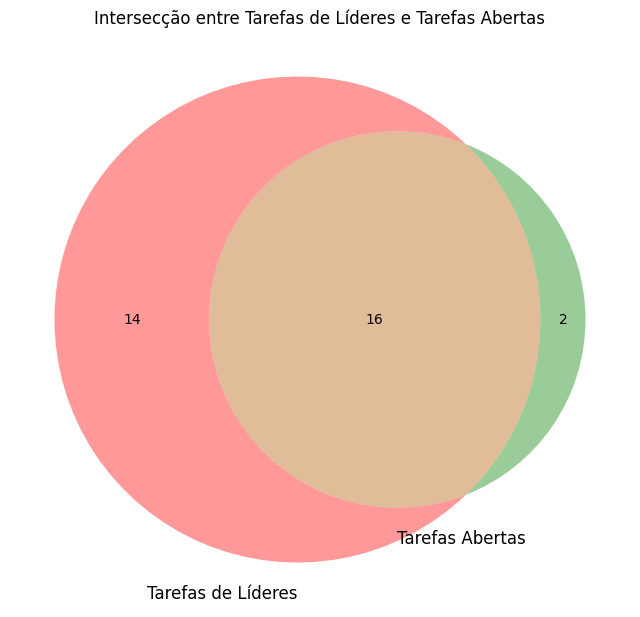

In [107]:
# Crie esta nova célula no seu notebook

# 1. Importa as bibliotecas necessárias
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

# 2. Cria os conjuntos de dados a partir do seu df_analise
#    (Supondo que a coluna 'Posição' foi adicionada ao df_analise)

# Conjunto A: Pega os IDs únicos de todas as tarefas de líderes
tarefas_de_lideres = set(df_analise[df_analise['Posição'] == 'Lider']['ID'])

# Conjunto B: Pega os IDs únicos de todas as tarefas "Abertas"
tarefas_abertas = set(df_analise[df_analise['Status_Tarefa'] == 'Aberto']['ID'])

# 3. Desenha o Diagrama de Venn de 2 círculos
plt.figure(figsize=(8, 8)) # Define o tamanho da figura
venn2(
    [tarefas_de_lideres, tarefas_abertas], # Passa os dois conjuntos
    set_labels=('Tarefas de Líderes', 'Tarefas Abertas') # Dá um nome a cada círculo
)
plt.title("Intersecção entre Tarefas de Líderes e Tarefas Abertas")
plt.show() # Mostra o gráfico

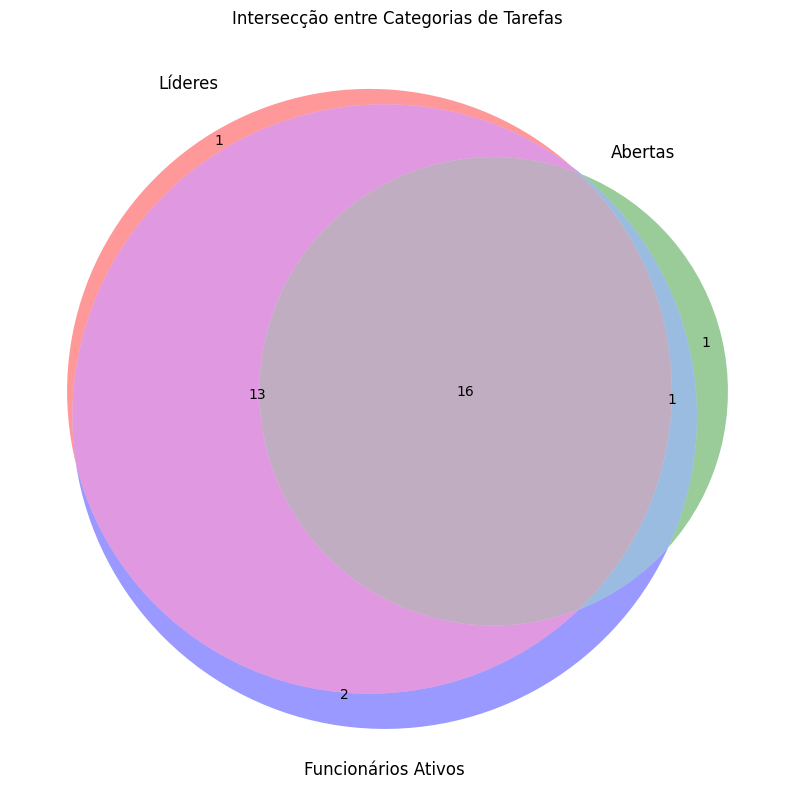

In [108]:
# Crie esta célula para o exemplo de 3 círculos

# Conjunto C: Pega os IDs únicos de tarefas de funcionários "Ativos"
tarefas_funcionarios_ativos = set(df_analise[df_analise['Status_Funcionario'] == 'Ativo']['ID'])

# Desenha o Diagrama de Venn de 3 círculos
plt.figure(figsize=(10, 10))
venn3(
    [tarefas_de_lideres, tarefas_abertas, tarefas_funcionarios_ativos],
    set_labels=('Líderes', 'Abertas', 'Funcionários Ativos')
)
plt.title("Intersecção entre Categorias de Tarefas")
plt.show()

In [113]:
# ==============================================================================
# GRÁFICO 8: Diagrama de Venn do Fluxo de Tarefas Mensal
# ==============================================================================

# --- 1. Instalação e Imports Necessários ---
!pip install matplotlib-venn -q

from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# --- 2. Preparação dos Dados ---

# Garante que as colunas de data estão no formato correto
# --- CORREÇÃO AQUI: Usa 'Data Final (aberta)' em vez de 'Data Final' ---
df_venn = df_analise.dropna(subset=['Data Inicial', 'Data Final (aberta)']).copy()
df_venn['Data Inicial'] = pd.to_datetime(df_venn['Data Inicial'])
df_venn['Data Final (aberta)'] = pd.to_datetime(df_venn['Data Final (aberta)'])

# Cria colunas 'Ano-Mês' para facilitar a filtragem
df_venn['Ano_Mes_Inicial'] = df_venn['Data Inicial'].dt.strftime('%Y-%m')
df_venn['Ano_Mes_Final'] = df_venn['Data Final (aberta)'].dt.strftime('%Y-%m')

# Pega a lista de todos os meses únicos disponíveis nos dados para o nosso filtro
meses_disponiveis = sorted(
    pd.unique(df_venn[['Ano_Mes_Inicial', 'Ano_Mes_Final']].values.ravel('K'))
)

print("Dados preparados para o Diagrama de Venn.")


# --- 3. Criação da Função Interativa ---

# Esta função será chamada toda vez que o valor do menu suspenso mudar
def plotar_diagrama_venn(mes_selecionado):

    # a. Cria os dois conjuntos de dados principais para o mês selecionado
    # Conjunto 1: IDs de tarefas que COMEÇARAM no mês
    tarefas_iniciadas_no_mes = set(df_venn[df_venn['Ano_Mes_Inicial'] == mes_selecionado]['ID'])

    # Conjunto 2: IDs de tarefas que TERMINARAM no mês
    tarefas_finalizadas_no_mes = set(df_venn[df_venn['Ano_Mes_Final'] == mes_selecionado]['ID'])

    # b. Calcula os 3 valores para o diagrama de Venn
    # Tarefas que apenas iniciaram no mês (mas não terminaram)
    iniciadas_apenas = len(tarefas_iniciadas_no_mes - tarefas_finalizadas_no_mes)

    # Tarefas que apenas finalizaram no mês (mas não iniciaram)
    finalizadas_apenas = len(tarefas_finalizadas_no_mes - tarefas_iniciadas_no_mes)

    # Intersecção: Tarefas que iniciaram E finalizaram no mesmo mês
    iniciadas_e_finalizadas = len(tarefas_iniciadas_no_mes.intersection(tarefas_finalizadas_no_mes))

    # c. Desenha o gráfico
    plt.figure(figsize=(10, 8))

    # venn2 aceita uma tupla com (Apenas A, Apenas B, Intersecção)
    diagrama = venn2(
        subsets=(iniciadas_apenas, finalizadas_apenas, iniciadas_e_finalizadas),
        set_labels=('Iniciadas neste Mês', 'Finalizadas neste Mês')
    )

    # --- CORREÇÃO AQUI: Verifica se cada secção existe antes de a customizar ---
    # Customiza as cores e textos apenas para as secções com valores > 0
    if diagrama and diagrama.get_patch_by_id('10'):
        diagrama.get_patch_by_id('10').set_color('skyblue')
        diagrama.get_label_by_id('10').set_text(f'Iniciaram\n(mas não terminaram)\n{iniciadas_apenas}')

    if diagrama and diagrama.get_patch_by_id('01'):
        diagrama.get_patch_by_id('01').set_color('lightgreen')
        diagrama.get_label_by_id('01').set_text(f'Terminaram\n(mas não iniciaram)\n{finalizadas_apenas}')

    if diagrama and diagrama.get_patch_by_id('11'):
        diagrama.get_patch_by_id('11').set_color('gold')
        diagrama.get_label_by_id('11').set_text(f'Ciclo Completo\n(início e fim)\n{iniciadas_e_finalizadas}')

    plt.title(f'Fluxo de Tarefas para o Mês de {mes_selecionado}', fontsize=16)
    plt.show()


# --- 4. Criação e Exibição da Interface Interativa ---

interactive_venn = widgets.interactive(
    plotar_diagrama_venn,
    mes_selecionado=widgets.Dropdown(
        options=meses_disponiveis,
        value=meses_disponiveis[-1], # Começa mostrando o último mês por padrão
        description='Selecione o Mês:',
        style={'description_width': 'initial'}
    )
)

# Exibe o menu suspenso e o gráfico
display(interactive_venn)


Dados preparados para o Diagrama de Venn.


interactive(children=(Dropdown(description='Selecione o Mês:', index=11, options=('2024-09', '2024-10', '2024-…

In [61]:
#df
#df_grafico
#df_equipe